In [1]:
import pandas as pd

def readFile(file_path, array_name):
    try:
        df = pd.read_csv(file_path, sep='::', engine='python',header=None, names=array_name, encoding='latin-1')
        return df
    except FileNotFoundError:
        print(f'File {file_path} not found.')
        
df_movies = readFile("movies.dat", ['MovieID','Title','Genres'])
print(df_movies.head(10))
print('Count movies: ',df_movies['MovieID'].count())
df_ratings = readFile("ratings.dat",['UserID','MovieID','Rating','Timestamp'])
print('\n',df_ratings.head(10))
print('Count ratings: ',df_ratings['UserID'].count())
df_users = readFile("users.dat",['UserID','Gender','Age','Occupation','Zip-code'])
print('\n',df_users.head(10))
print('Count users: ',df_users['UserID'].count())

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
5        6                         Heat (1995)         Action|Crime|Thriller
6        7                      Sabrina (1995)                Comedy|Romance
7        8                 Tom and Huck (1995)          Adventure|Children's
8        9                 Sudden Death (1995)                        Action
9       10                    GoldenEye (1995)     Action|Adventure|Thriller
Count movies:  3883

    UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      91

In [2]:
#Tóm lược dữ liệu
select_summary = df_ratings['Rating']
print('Summary')
print(select_summary.describe())

Summary
count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64


In [3]:
missing_values_movies = df_movies.isnull().sum() 
print('Missing value movies')
print(missing_values_movies)

missing_values_ratings = df_ratings.isnull().sum()
print('\nMissing value ratings')
print(missing_values_ratings)

missing_values_users = df_users.isnull().sum()
print('\nMissing value users')
print(missing_values_users)

Missing value movies
MovieID    0
Title      0
Genres     0
dtype: int64

Missing value ratings
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

Missing value users
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64


In [4]:
#Đếm cột bị trùng lặp
duplicate_movies = df_movies.duplicated().sum()
duplicate_ratings = df_ratings.duplicated().sum()
duplicate_users = df_users.duplicated().sum()
print('Duplicate movies: ',duplicate_movies)
print('Duplicate ratings: ',duplicate_ratings)
print('Duplicate users: ',duplicate_users)

Duplicate movies:  0
Duplicate ratings:  0
Duplicate users:  0


In [5]:
#Loại bỏ dữ liệu trùng lặp
df_movies = df_movies.drop_duplicates()
df_ratings = df_ratings.drop_duplicates()
df_users = df_users.drop_duplicates()
print('Count movies: ',df_movies['MovieID'].count())
print('Count ratings: ',df_ratings['UserID'].count())
print('Count users: ',df_users['UserID'].count())

Count movies:  3883
Count ratings:  1000209
Count users:  6040


In [7]:
df_ratings['Datetime'] = pd.to_datetime(df_ratings['Timestamp'], unit='s', errors='coerce').dt.strftime('%d/%m/%Y %H:%M:%S')
print(df_ratings.head(10))

  UserID MovieID  Rating  Timestamp             Datetime
0      1    1193       5  978300760  31/12/2000 22:12:40
1      1     661       3  978302109  31/12/2000 22:35:09
2      1     914       3  978301968  31/12/2000 22:32:48
3      1    3408       4  978300275  31/12/2000 22:04:35
4      1    2355       5  978824291  06/01/2001 23:38:11
5      1    1197       3  978302268  31/12/2000 22:37:48
6      1    1287       5  978302039  31/12/2000 22:33:59
7      1    2804       5  978300719  31/12/2000 22:11:59
8      1     594       4  978302268  31/12/2000 22:37:48
9      1     919       4  978301368  31/12/2000 22:22:48


In [4]:
#Tách tên phim và năm phát hành trong movies.dat
df_movies['Key'] = df_movies['Title'].str.rsplit('(',n=1,expand=True)[0].str[:-1]
df_movies['Year'] = df_movies['Title'].str.rsplit('(',n=1,expand=True)[1].str[:-1]
print(df_movies.head(10))

  MovieID                               Title                        Genres  \
0       1                    Toy Story (1995)   Animation|Children's|Comedy   
1       2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2       3             Grumpier Old Men (1995)                Comedy|Romance   
3       4            Waiting to Exhale (1995)                  Comedy|Drama   
4       5  Father of the Bride Part II (1995)                        Comedy   
5       6                         Heat (1995)         Action|Crime|Thriller   
6       7                      Sabrina (1995)                Comedy|Romance   
7       8                 Tom and Huck (1995)          Adventure|Children's   
8       9                 Sudden Death (1995)                        Action   
9      10                    GoldenEye (1995)     Action|Adventure|Thriller   

                           Key  Year  
0                    Toy Story  1995  
1                      Jumanji  1995  
2            

In [5]:
#Tách cột thể loại (Genres) thành các cột thể loại cụ thể
genres = pd.unique(df_movies['Genres'].str.split('|',expand=True).stack())

#Thêm các cột thể loại vào và cho giá trị bằng 0
for genre in genres:
    df_movies[genre] = 0

#Chuyển các giá trị thành 1 tương ứng
for i in range(len(df_movies['Genres'])):
    for x in df_movies['Genres'][i].split('|'):
        df_movies.loc[i,x] = 1
        
print(df_movies.head(10))
df_movies.to_csv('movies_preprocessing1.csv',index=False)

  MovieID                               Title                        Genres  \
0       1                    Toy Story (1995)   Animation|Children's|Comedy   
1       2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2       3             Grumpier Old Men (1995)                Comedy|Romance   
3       4            Waiting to Exhale (1995)                  Comedy|Drama   
4       5  Father of the Bride Part II (1995)                        Comedy   
5       6                         Heat (1995)         Action|Crime|Thriller   
6       7                      Sabrina (1995)                Comedy|Romance   
7       8                 Tom and Huck (1995)          Adventure|Children's   
8       9                 Sudden Death (1995)                        Action   
9      10                    GoldenEye (1995)     Action|Adventure|Thriller   

                           Key  Year  Animation  Children's  Comedy  \
0                    Toy Story  1995          1           1

In [13]:
#test kq
print(df_ratings.query('MovieID == 1')['Rating'].mean())
print(df_ratings.query('MovieID == 1')['UserID'].count())

#Tính mean rating mỗi movie file ratings.dat
x = df_ratings.groupby('MovieID').Rating.mean()
print(x)

#Tính count UserID mỗi movie file ratings.dat
y = df_ratings.groupby('MovieID').UserID.count()
print(y)

#movies.dat thêm mean rating
movies = pd.merge(df_movies,x,how='outer',on='MovieID')
movies.fillna({'Rating':'0'}, inplace=True)

#movies.dat thêm count UserID
movies = pd.merge(movies,y,how='outer',on='MovieID')
movies.fillna({'UserID':'0'}, inplace=True)

#Thay tên cột tránh nhầm lẫn
movies['MeanRating'] = movies['Rating'].astype('float64')
movies['CountUsers'] = movies['UserID']
movies = movies.drop(columns=['Title','Genres','Rating','UserID'])
print(movies.head(10))
movies.to_csv('movies_preprocessing2.csv',index=False)

nan
0
MovieID
1       4.146846
10      3.540541
100     3.062500
1000    3.050000
1002    4.250000
          ...   
994     4.095556
996     2.906250
997     3.357143
998     3.010753
999     3.283217
Name: Rating, Length: 3706, dtype: float64
MovieID
1       2077
10       888
100      128
1000      20
1002       8
        ... 
994      450
996      256
997       28
998       93
999      286
Name: UserID, Length: 3706, dtype: int64
  MovieID                        Key  Year  Animation  Children's  Comedy  \
0       1                  Toy Story  1995          1           1       1   
1      10                  GoldenEye  1995          0           0       0   
2     100                  City Hall  1996          0           0       0   
3    1000                    Curdled  1996          0           0       0   
4    1001  Associate, The (L'Associe  1982          0           0       1   
5    1002             Ed's Next Move  1996          0           0       1   
6    1003           Extre

In [2]:
#Đổi tên các giá trị viết tắt trong users.dat
df_users['Gender'] = df_users['Gender'].map({
    'M':'Male',
    'F':'Female'
})
df_users['Age'] = df_users['Age'].map({
    1:'0-17',
    18:'18-24',
    25:'25-34',
    35:'35-44',
    45:'45-49',
    50:'50-55',
    56:'56+'
})
df_users['Occupation'] = df_users['Occupation'].map({
    0:'other',
    1:'academic/educator',
    2:'artist',
    3:'clerical/admin',
    4:'college/grad student',
    5:'customer service',
    6:'doctor/health care',
    7:'executive/managerial',
    8:'farmer',
    9:'homemaker',
    10:'K-12 student',
    11:'lawyer',
    12:'programmer',
    13:'retired',
    14:'sales/marketing',
    15:'scientist',
    16:'self-employed',
    17:'technician/engineer',
    18:'tradesman/craftsman',
    19:'unemployed',
    20:'writer'
})
print(df_users.head(10))

   UserID  Gender    Age            Occupation Zip-code
0       1  Female   0-17          K-12 student    48067
1       2    Male    56+         self-employed    70072
2       3    Male  25-34             scientist    55117
3       4    Male  45-49  executive/managerial    02460
4       5    Male  25-34                writer    55455
5       6  Female  50-55             homemaker    55117
6       7    Male  35-44     academic/educator    06810
7       8    Male  25-34            programmer    11413
8       9    Male  25-34   technician/engineer    61614
9      10  Female  35-44     academic/educator    95370


In [8]:
#Tránh việc sau khi merge dữ liệu này thành số
df_ratings['UserID'] = df_ratings['UserID'].astype(str)
df_users['UserID'] = df_users['UserID'].astype(str)
df_ratings['MovieID'] = df_ratings['MovieID'].astype(str)
df_movies['MovieID'] = df_movies['MovieID'].astype(str)

#Gộp 3 file vào làm 1 để xử lý mối quan hệ giữa các thuộc tính
#của người xem và thuộc tính phim
test = pd.merge(df_ratings, df_movies, how='inner',on='MovieID')
test.dropna()

test = pd.merge(test,df_users, how='inner',on='UserID')
test.dropna()

#Giữ lại các cột cần thiết
test = test.drop(columns=['Timestamp','Datetime','Title','Genres','Key','Year','Zip-code'])
test.to_csv('test_merge_preprocessing.csv', sep='\t',index=False)

# UserID,MovieID,Rating,Timestamp,Datetime,Title,Genres,Key,Year,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Gender,Age,Occupation,Zip-code

Age
0-17      144
18-24     805
25-34    1538
35-44     855
45-49     361
50-55     350
56+       278
dtype: int64
144
805
1538
855
361
350
278
Age
0-17      78
18-24    298
25-34    558
35-44    338
45-49    189
50-55    146
56+      102
dtype: int64
78
298
558
338
189
146
102


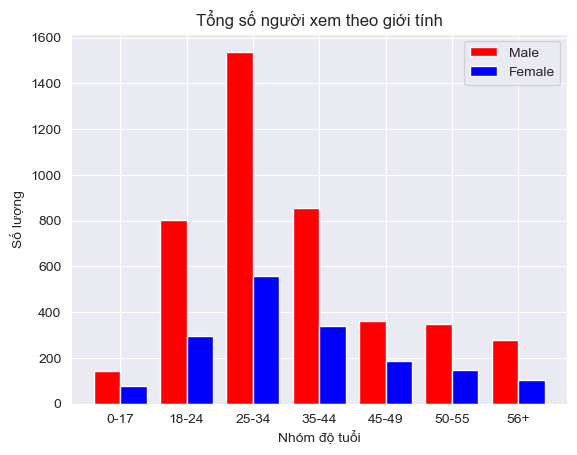

In [10]:
import numpy as np

#test kiem tra so luong dung khong
t_count = df_users[df_users['Gender'] == 'Male'].groupby('Age').size()
# t_count = t_count.reindex(X, fill_value=0)
print(t_count)
print(df_users.query('Gender == "Male" and Age == "0-17"').shape[0])
print(df_users.query('Gender == "Male" and Age == "18-24"').shape[0])
print(df_users.query('Gender == "Male" and Age == "25-34"').shape[0])
print(df_users.query('Gender == "Male" and Age == "35-44"').shape[0])
print(df_users.query('Gender == "Male" and Age == "45-49"').shape[0])
print(df_users.query('Gender == "Male" and Age == "50-55"').shape[0])
print(df_users.query('Gender == "Male" and Age == "56+"').shape[0])

print(df_users[df_users['Gender'] == 'Female'].groupby('Age').size())
print(df_users.query('Gender == "Female" and Age == "0-17"').shape[0])
print(df_users.query('Gender == "Female" and Age == "18-24"').shape[0])
print(df_users.query('Gender == "Female" and Age == "25-34"').shape[0])
print(df_users.query('Gender == "Female" and Age == "35-44"').shape[0])
print(df_users.query('Gender == "Female" and Age == "45-49"').shape[0])
print(df_users.query('Gender == "Female" and Age == "50-55"').shape[0])
print(df_users.query('Gender == "Female" and Age == "56+"').shape[0])

#Mảng chứa các độ tuổi
X = np.sort(df_users['Age'].dropna().unique())
X_axis = np.arange(len(X))

#Mảng chứa số lượng giới tính theo độ tuổi
male_count = np.array(df_users[df_users['Gender'] == 'Male'].groupby('Age').size().reindex(X))
female_count = np.array(df_users[df_users['Gender'] == 'Female'].groupby('Age').size().reindex(X))

#Vẽ bar chart
import matplotlib.pyplot as plt
width = 0.4
plt.bar(X_axis, male_count, width=width,label='Male', color='red')
plt.bar(X_axis + width, female_count, width=width,label='Female', color='blue')

plt.xticks(X_axis + width/2, X)
plt.xlabel('Nhóm độ tuổi')
plt.ylabel('Số lượng')
plt.title('Tổng số người xem theo giới tính')
plt.legend()
plt.show()

[4331 1709]


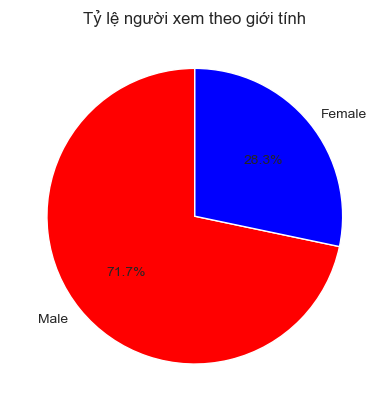

In [13]:
#Mảng chứa số lượng người xem theo giới tính
gender_pie = np.array(df_users.groupby('Gender').size().reindex(['Male', 'Female']))
print(gender_pie)

#Vẽ pie chart
plt.pie(gender_pie, labels=['Male', 'Female'], colors=['red', 'blue'], autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ người xem theo giới tính')
plt.show()

Text(0.5, 1.0, 'Tỷ lệ người xem theo nghề nghiệp')

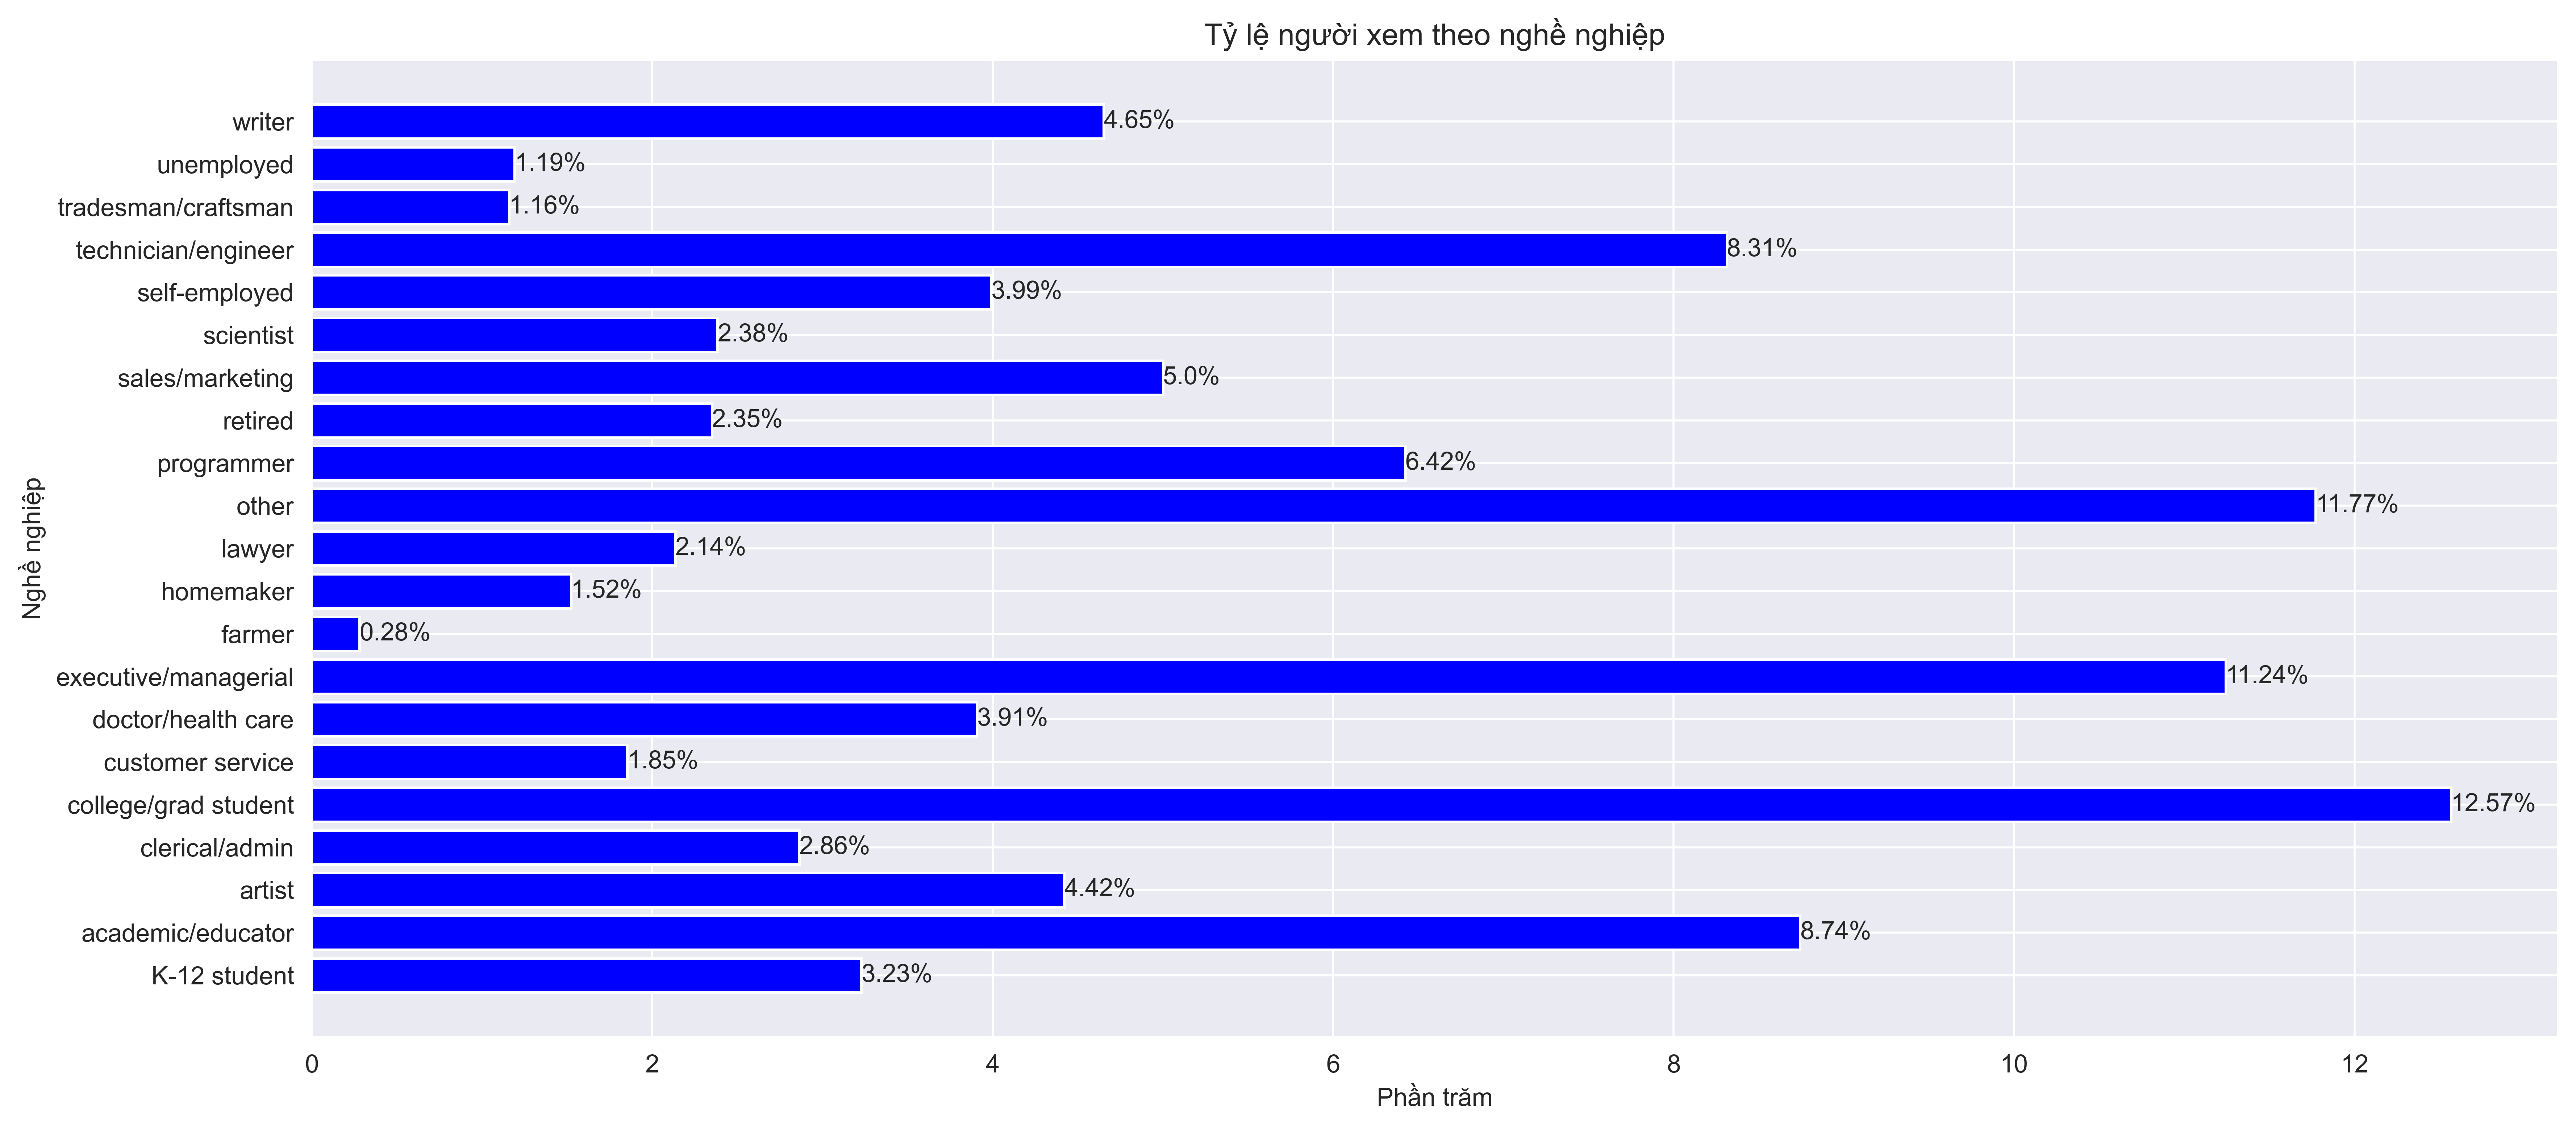

In [11]:
#Lấy ra các nghề nghiệp
occupacy_label = np.sort(df_users['Occupation'].dropna().unique())

#Mảng chứa số lượng người theo nghề nghiệp
occupation_bar = np.array((df_users.groupby('Occupation').size()/6040*100).reindex(occupacy_label))

#Vẽ biểu đồ thanh ngang
plt.figure(figsize=(16,7), dpi=500)
plt.barh(occupacy_label, occupation_bar,color='blue')

# Thêm giá trị lên mỗi cột
for i in range(len(occupation_bar)):
    plt.text(occupation_bar[i], i, f"{round(occupation_bar[i],2)}%", va='center')
    
plt.xlabel('Phần trăm')
plt.ylabel('Nghề nghiệp')
plt.title('Tỷ lệ người xem theo nghề nghiệp')



[1919 1922 1925 1928 1931 1934 1937 1940 1943 1946 1949 1952 1955 1958
 1961 1964 1967 1970 1973 1976 1979 1982 1985 1988 1991 1994 1997 2000]
1919


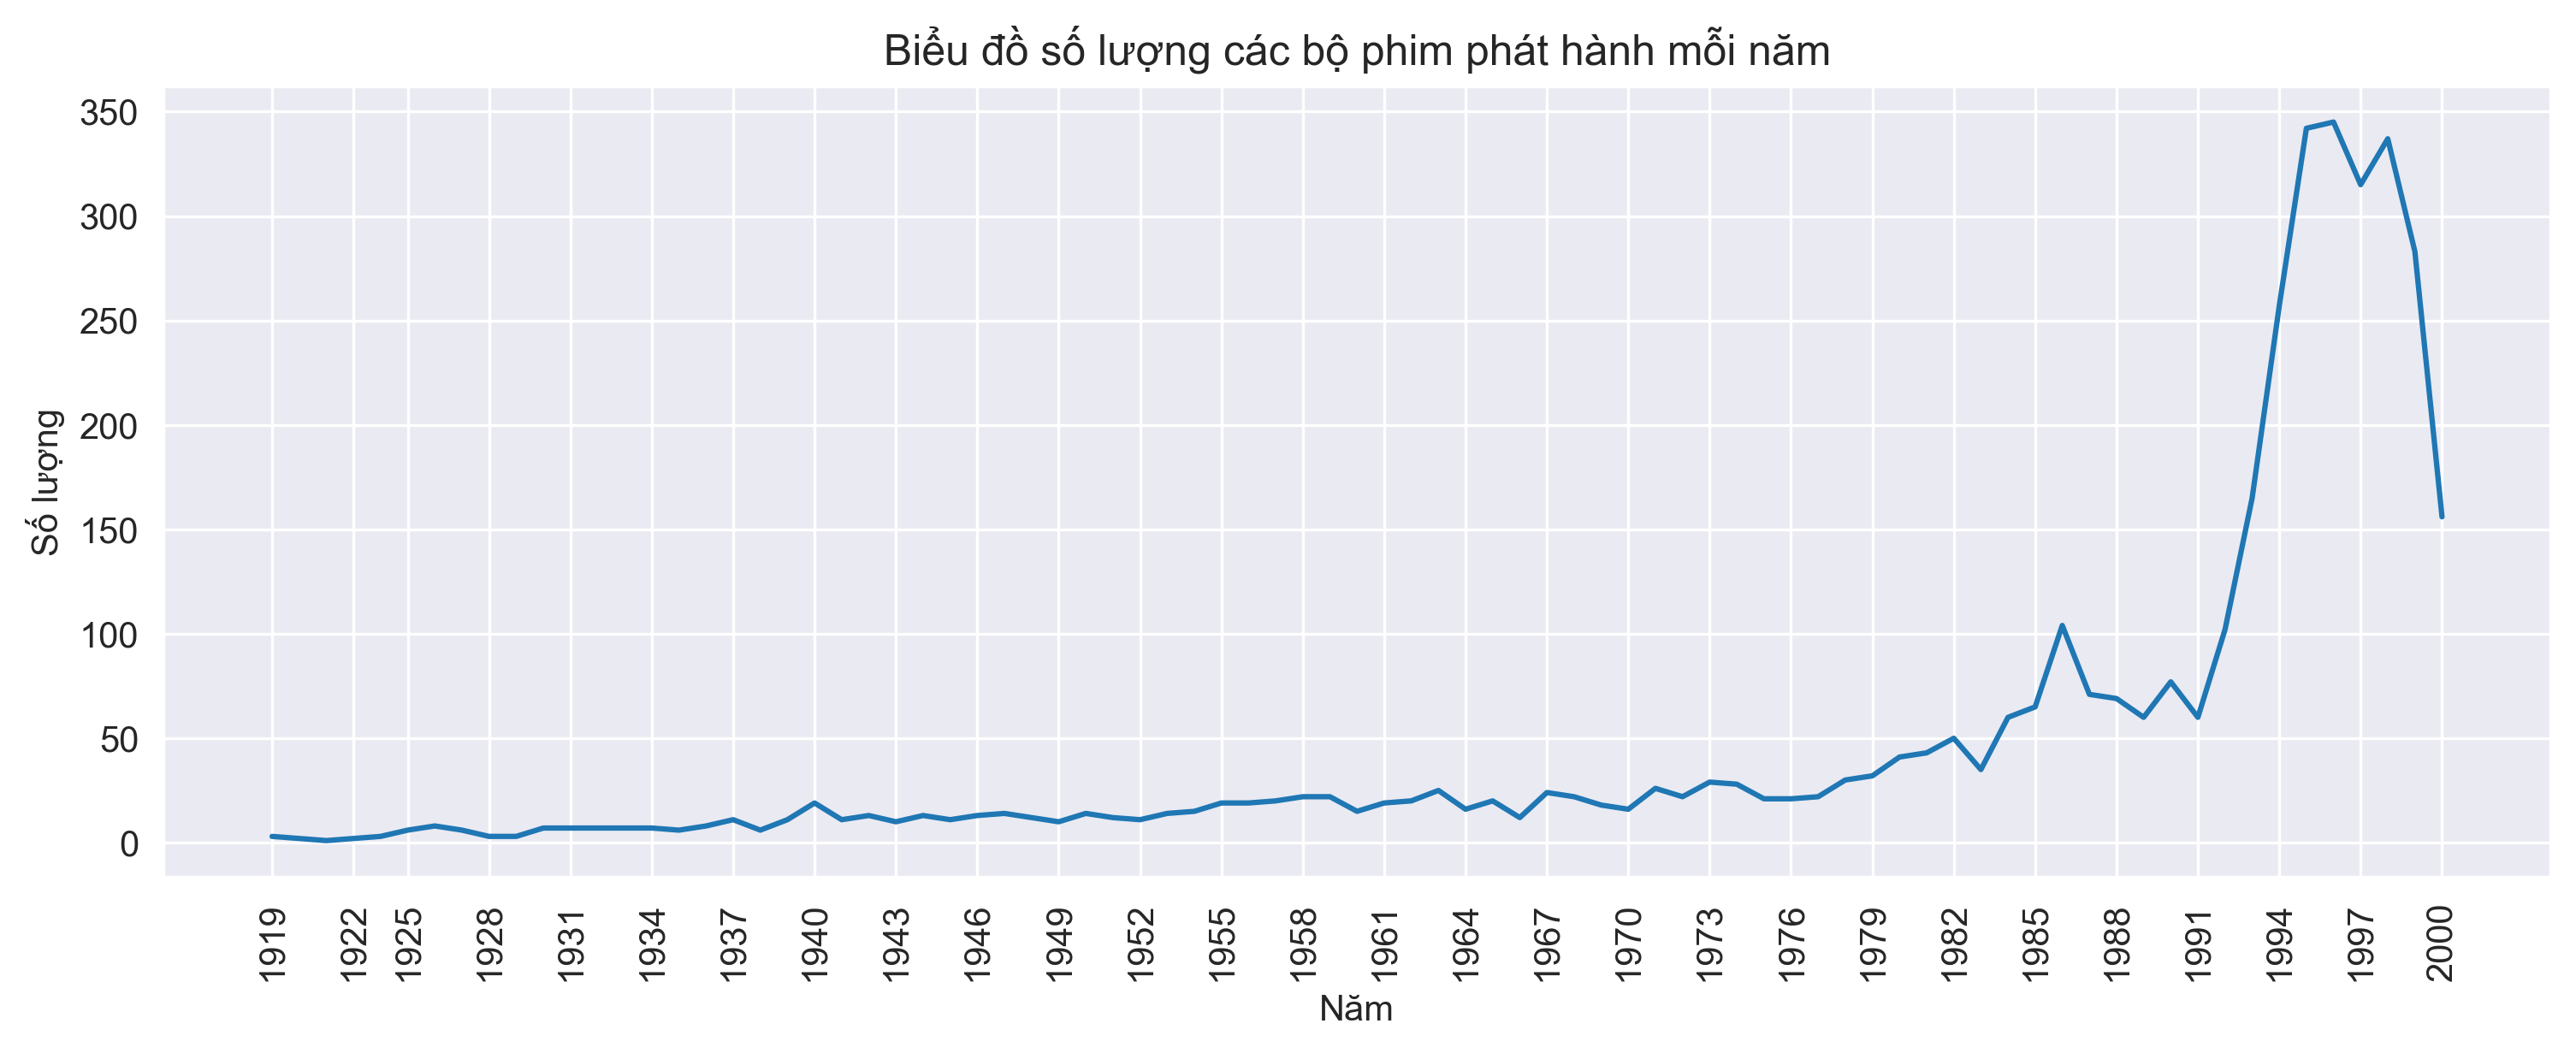

In [15]:
#Tạo mảng các năm phát hành cách nhau 1 khoảng thời gian cho biểu đồ dễ nhìn, max+1 vì sẽ từ min đến max
year_x_tick = np.arange(int(movies['Year'].min()), int(movies['Year'].max())+1, 3)
print(year_x_tick)
print(movies['Year'].min())

#Biểu đồ đường số lượng các bộ phim phát hành mỗi năm
plt.figure(figsize=(12,4), dpi=300)
plt.plot(movies.groupby('Year').Key.count())
plt.ylabel('Số lượng')
plt.xlabel('Năm')
plt.xticks(year_x_tick.astype(str), rotation=90)
plt.title('Biểu đồ số lượng các bộ phim phát hành mỗi năm')
plt.grid(True)
plt.show()

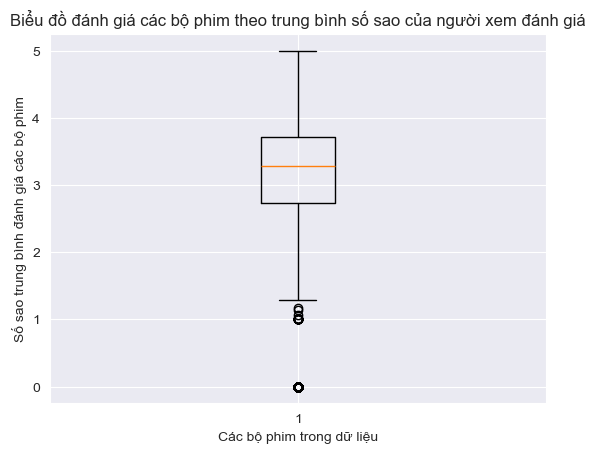

count    3883.000000
mean        3.091253
std         0.942703
min         0.000000
25%         2.729571
50%         3.280702
75%         3.720215
max         5.000000
Name: MeanRating, dtype: float64


In [16]:
#Biểu đồ đánh giá các bộ phim theo trung bình số sao của người xem đánh giá
plt.boxplot(movies['MeanRating'])
plt.xlabel('Các bộ phim trong dữ liệu')
plt.ylabel('Số sao trung bình đánh giá các bộ phim')
plt.title('Biểu đồ đánh giá các bộ phim theo trung bình số sao của người xem đánh giá')
plt.grid(True)
plt.show()
print(movies['MeanRating'].describe())

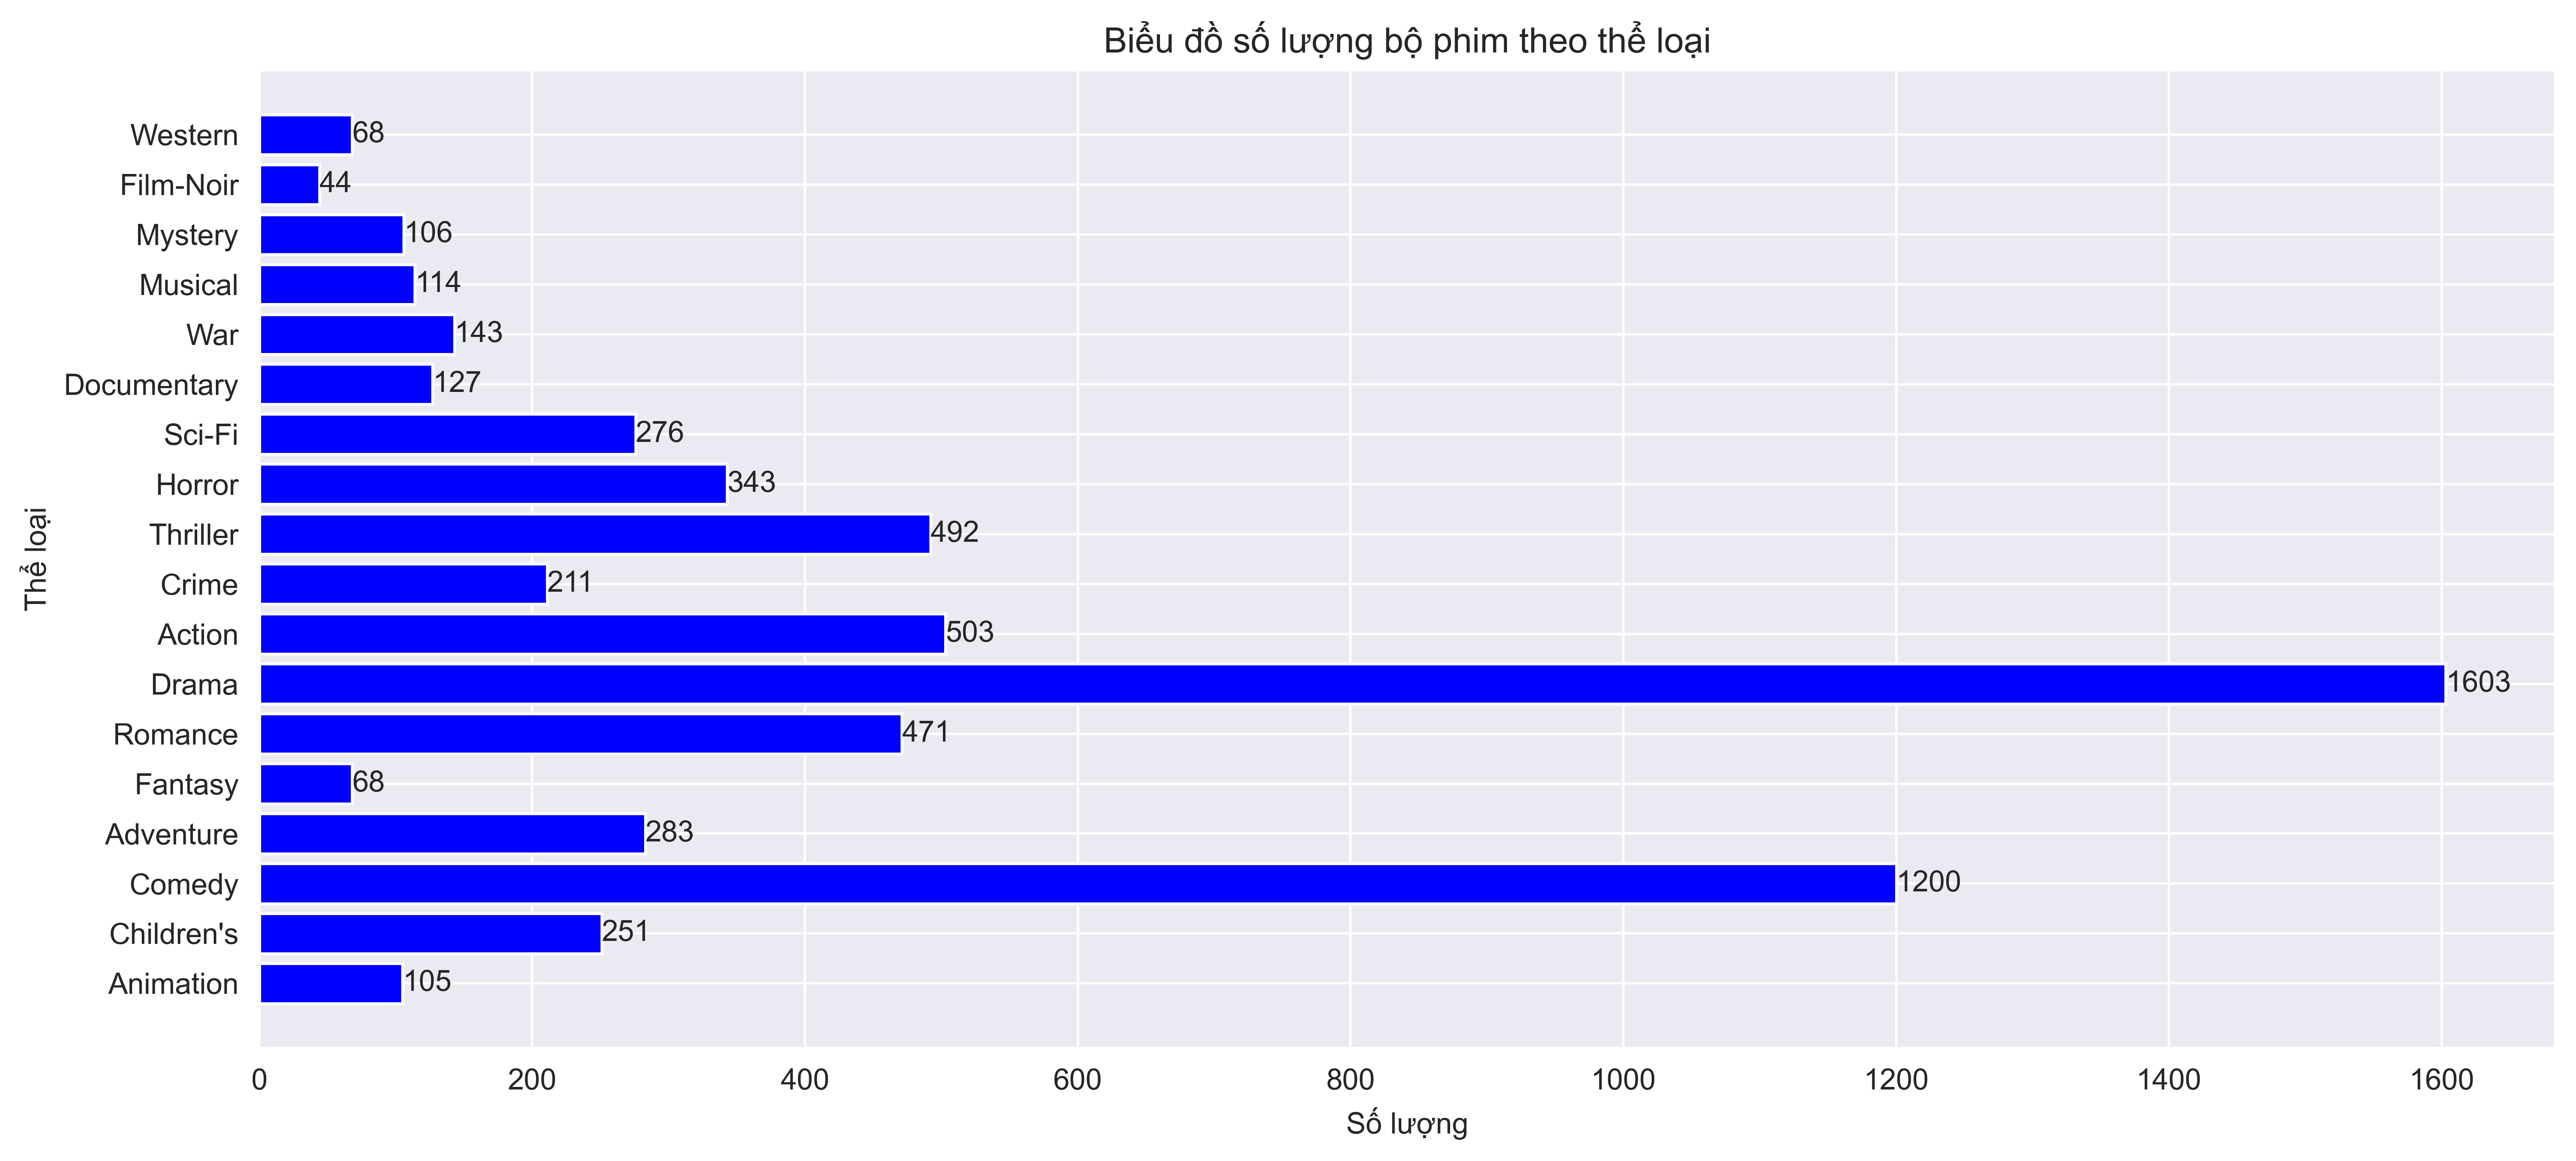

In [17]:
#Tính mảng số lượng phim theo thể loại
genres_array = []
for genre in genres:
    genres_array.append(movies.loc[movies[genre] == 1].shape[0])

#Vẽ biểu đồ thanh ngang
plt.figure(figsize=(14,6), dpi=500)
    
#Vẽ biểu đồ thanh hiển thị số lượng bộ phim theo thể loại
plt.barh(genres, genres_array, color='blue')
# Thêm giá trị lên mỗi cột
for i in range(len(genres)):
    plt.text(genres_array[i], i, genres_array[i], va='center')
plt.ylabel('Thể loại')
plt.xlabel('Số lượng')
plt.title('Biểu đồ số lượng bộ phim theo thể loại')
plt.show()

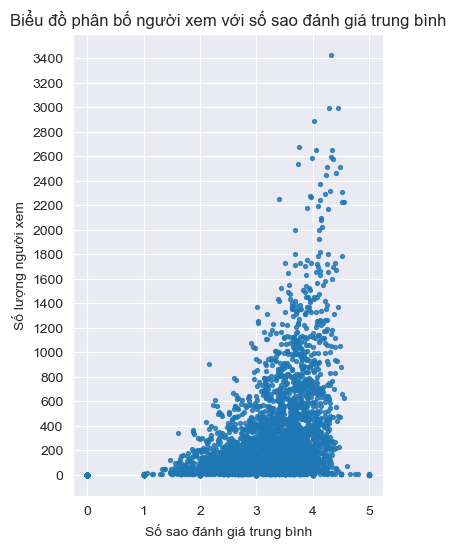

In [18]:
#Biểu đồ scatter hiển thị phân bố người xem với số sao đánh giá trung bình
plt.figure(figsize=(4,6), dpi=100)
plt.scatter(movies['MeanRating'], movies['CountUsers'], s=8, alpha=0.8)
plt.yticks(range(0, (movies['CountUsers'].astype(int).max()), 200))
plt.xlabel('Số sao đánh giá trung bình')
plt.ylabel('Số lượng người xem')
plt.title('Biểu đồ phân bố người xem với số sao đánh giá trung bình')
plt.grid(True)
plt.show()

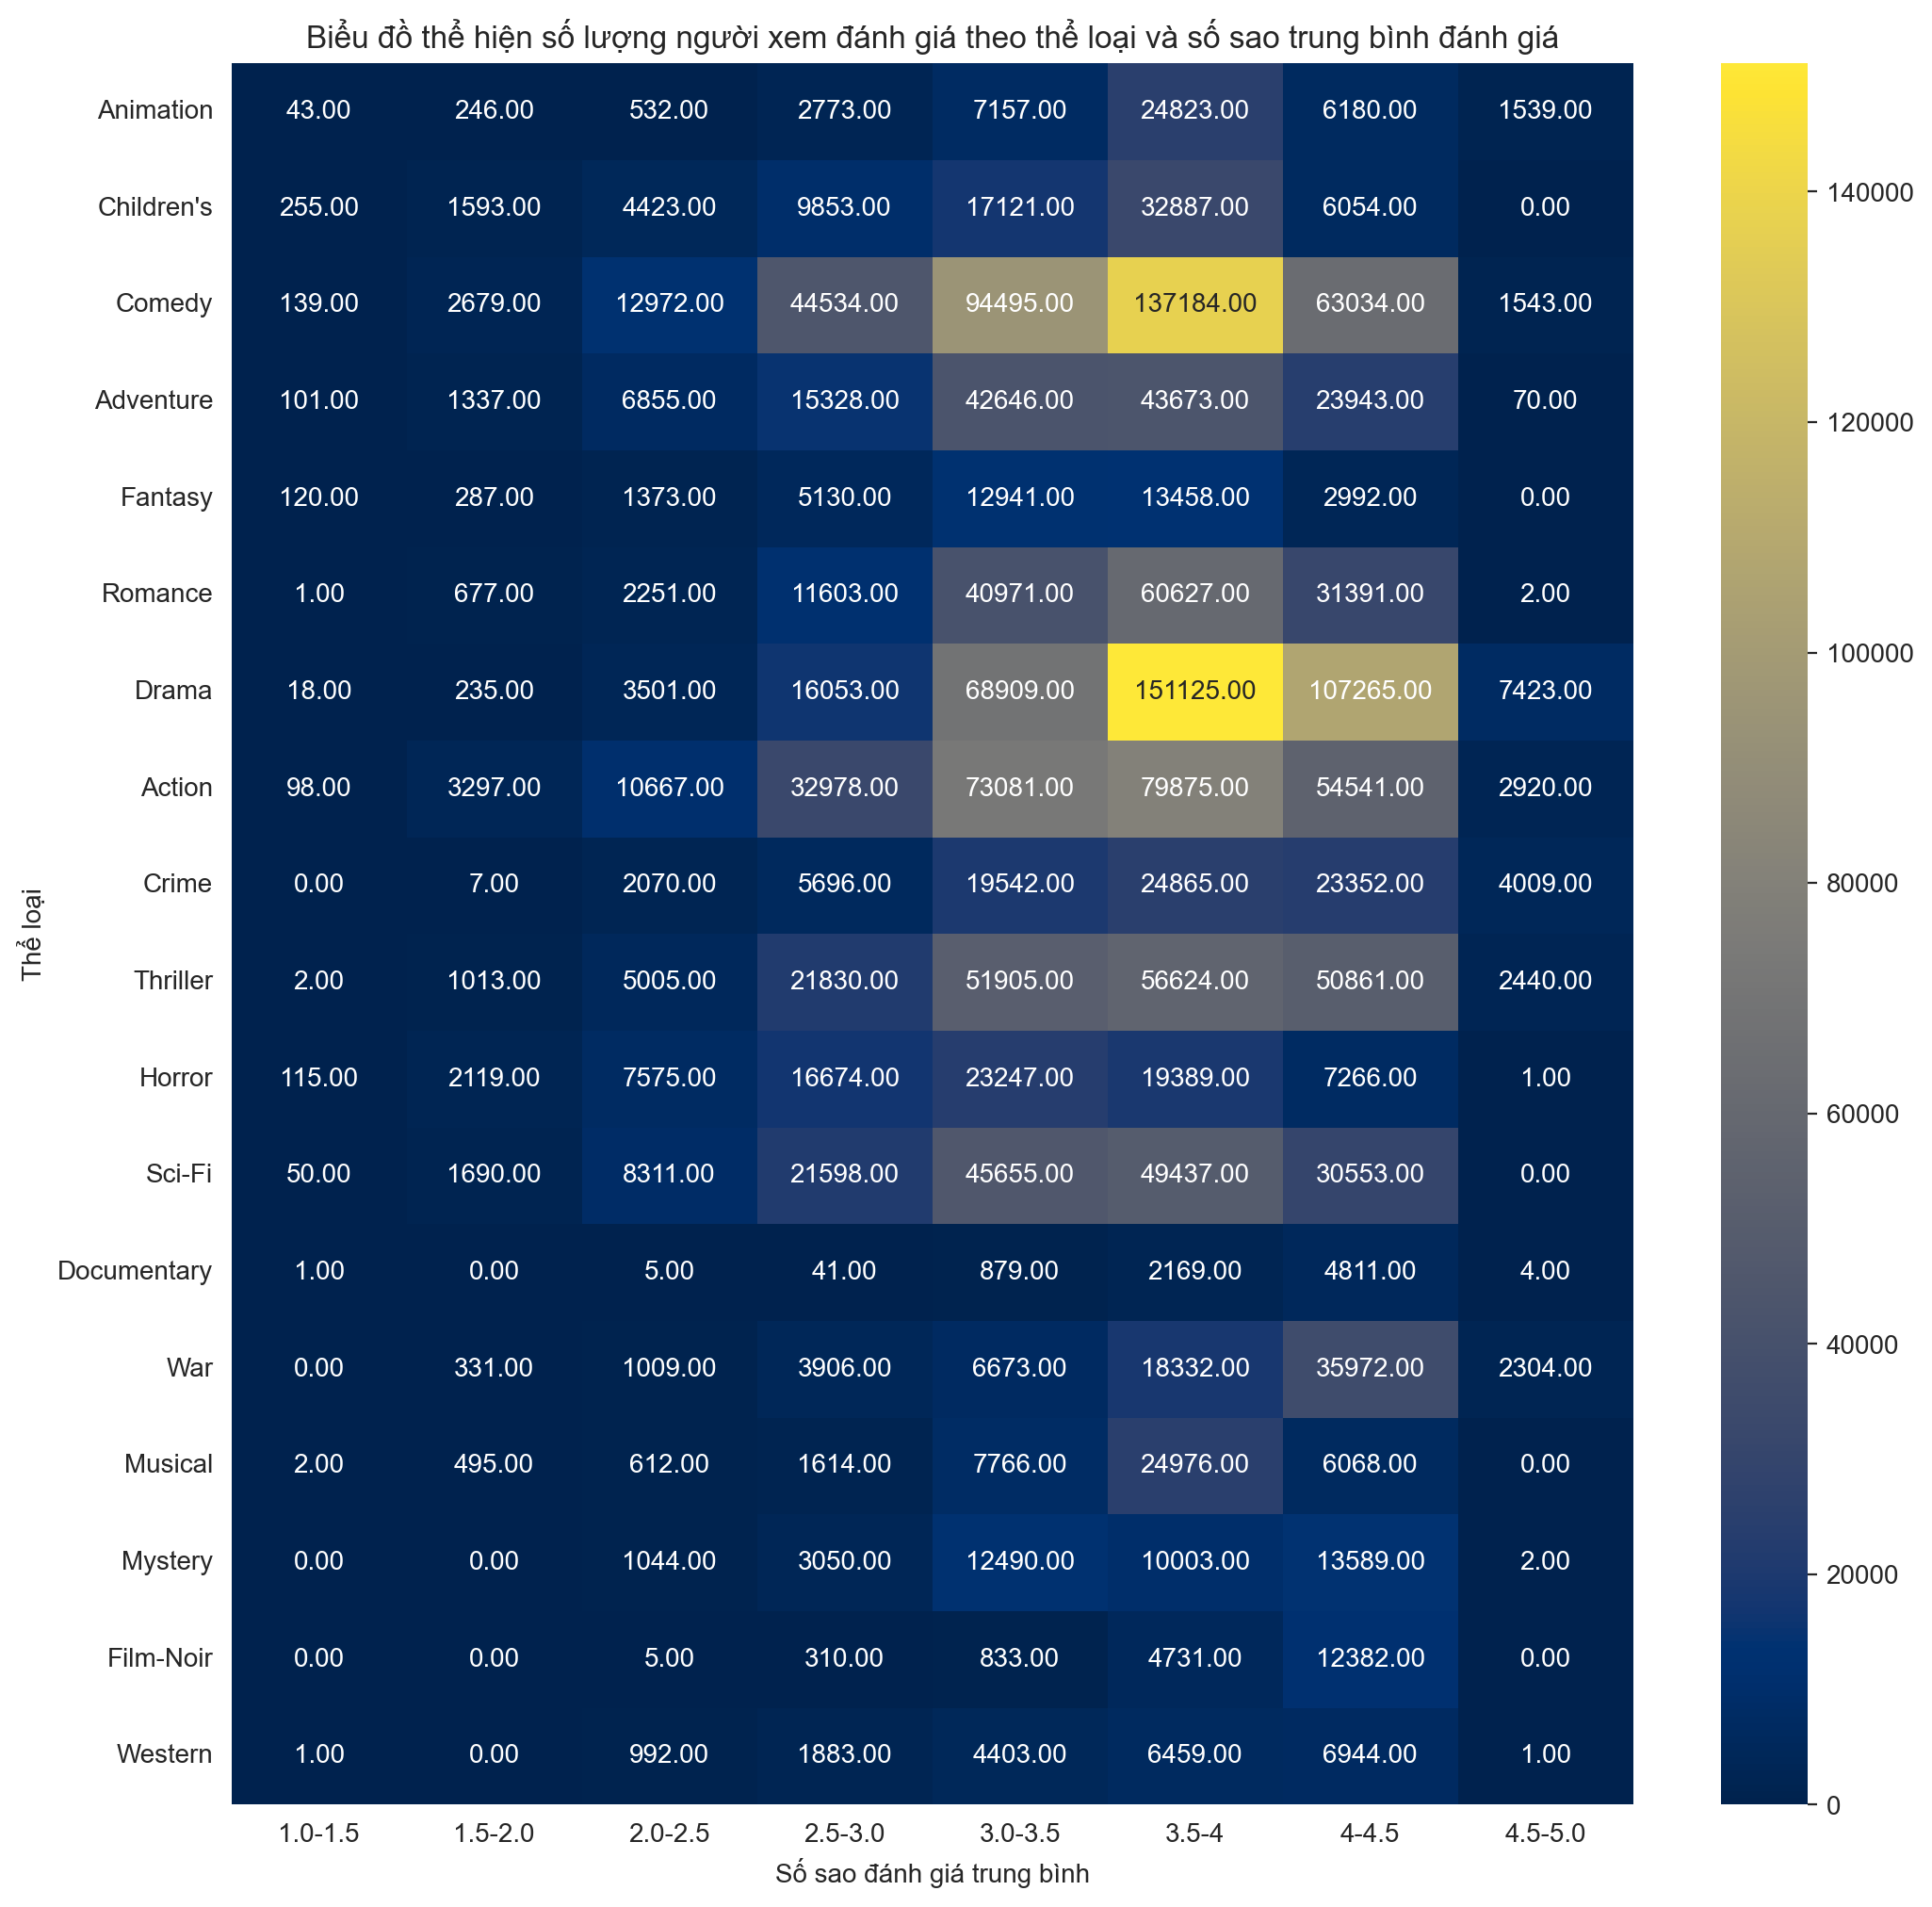

In [14]:
#Lấy ra dữ liệu tổng người xem theo đánh giá trung bình của thể loại
#Mảng chứa giá trị để tạo heatmap
gen_hm = np.zeros((len(genres),8))
#Mảng chứa giá trị sao đánh giá trung bình cần trích lấy thông tin
ruler = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5.000000001]

#Điền giá trị mảng 2 chiều bằng số lượng người xem theo thể loại từ đó lọc theo điều kiện số 
# sao trung bình và tính tổng số người xem đánh giá
c = -1
for genre in genres:
    c += 1
    for j in range(len(ruler)-1):
        condition = f'{ruler[j]}<=MeanRating<{ruler[j+1]}'
        gen_hm[c][j] = (movies.loc[movies[f"{genre}"] == 1].query(condition).CountUsers.sum())

#Vẽ heatmap
import seaborn as sns
plt.figure(figsize=(12,12), dpi=200)
sns.heatmap(gen_hm, annot=True, cmap='cividis', fmt='.2f', xticklabels=['1.0-1.5','1.5-2.0',
'2.0-2.5','2.5-3.0','3.0-3.5','3.5-4','4-4.5','4.5-5.0'], yticklabels=genres)

plt.title('Biểu đồ thể hiện số lượng người xem đánh giá theo thể loại và số sao trung bình đánh giá')
plt.xlabel('Số sao đánh giá trung bình')
plt.ylabel('Thể loại')
plt.savefig('heatmap.jpg')
plt.show()

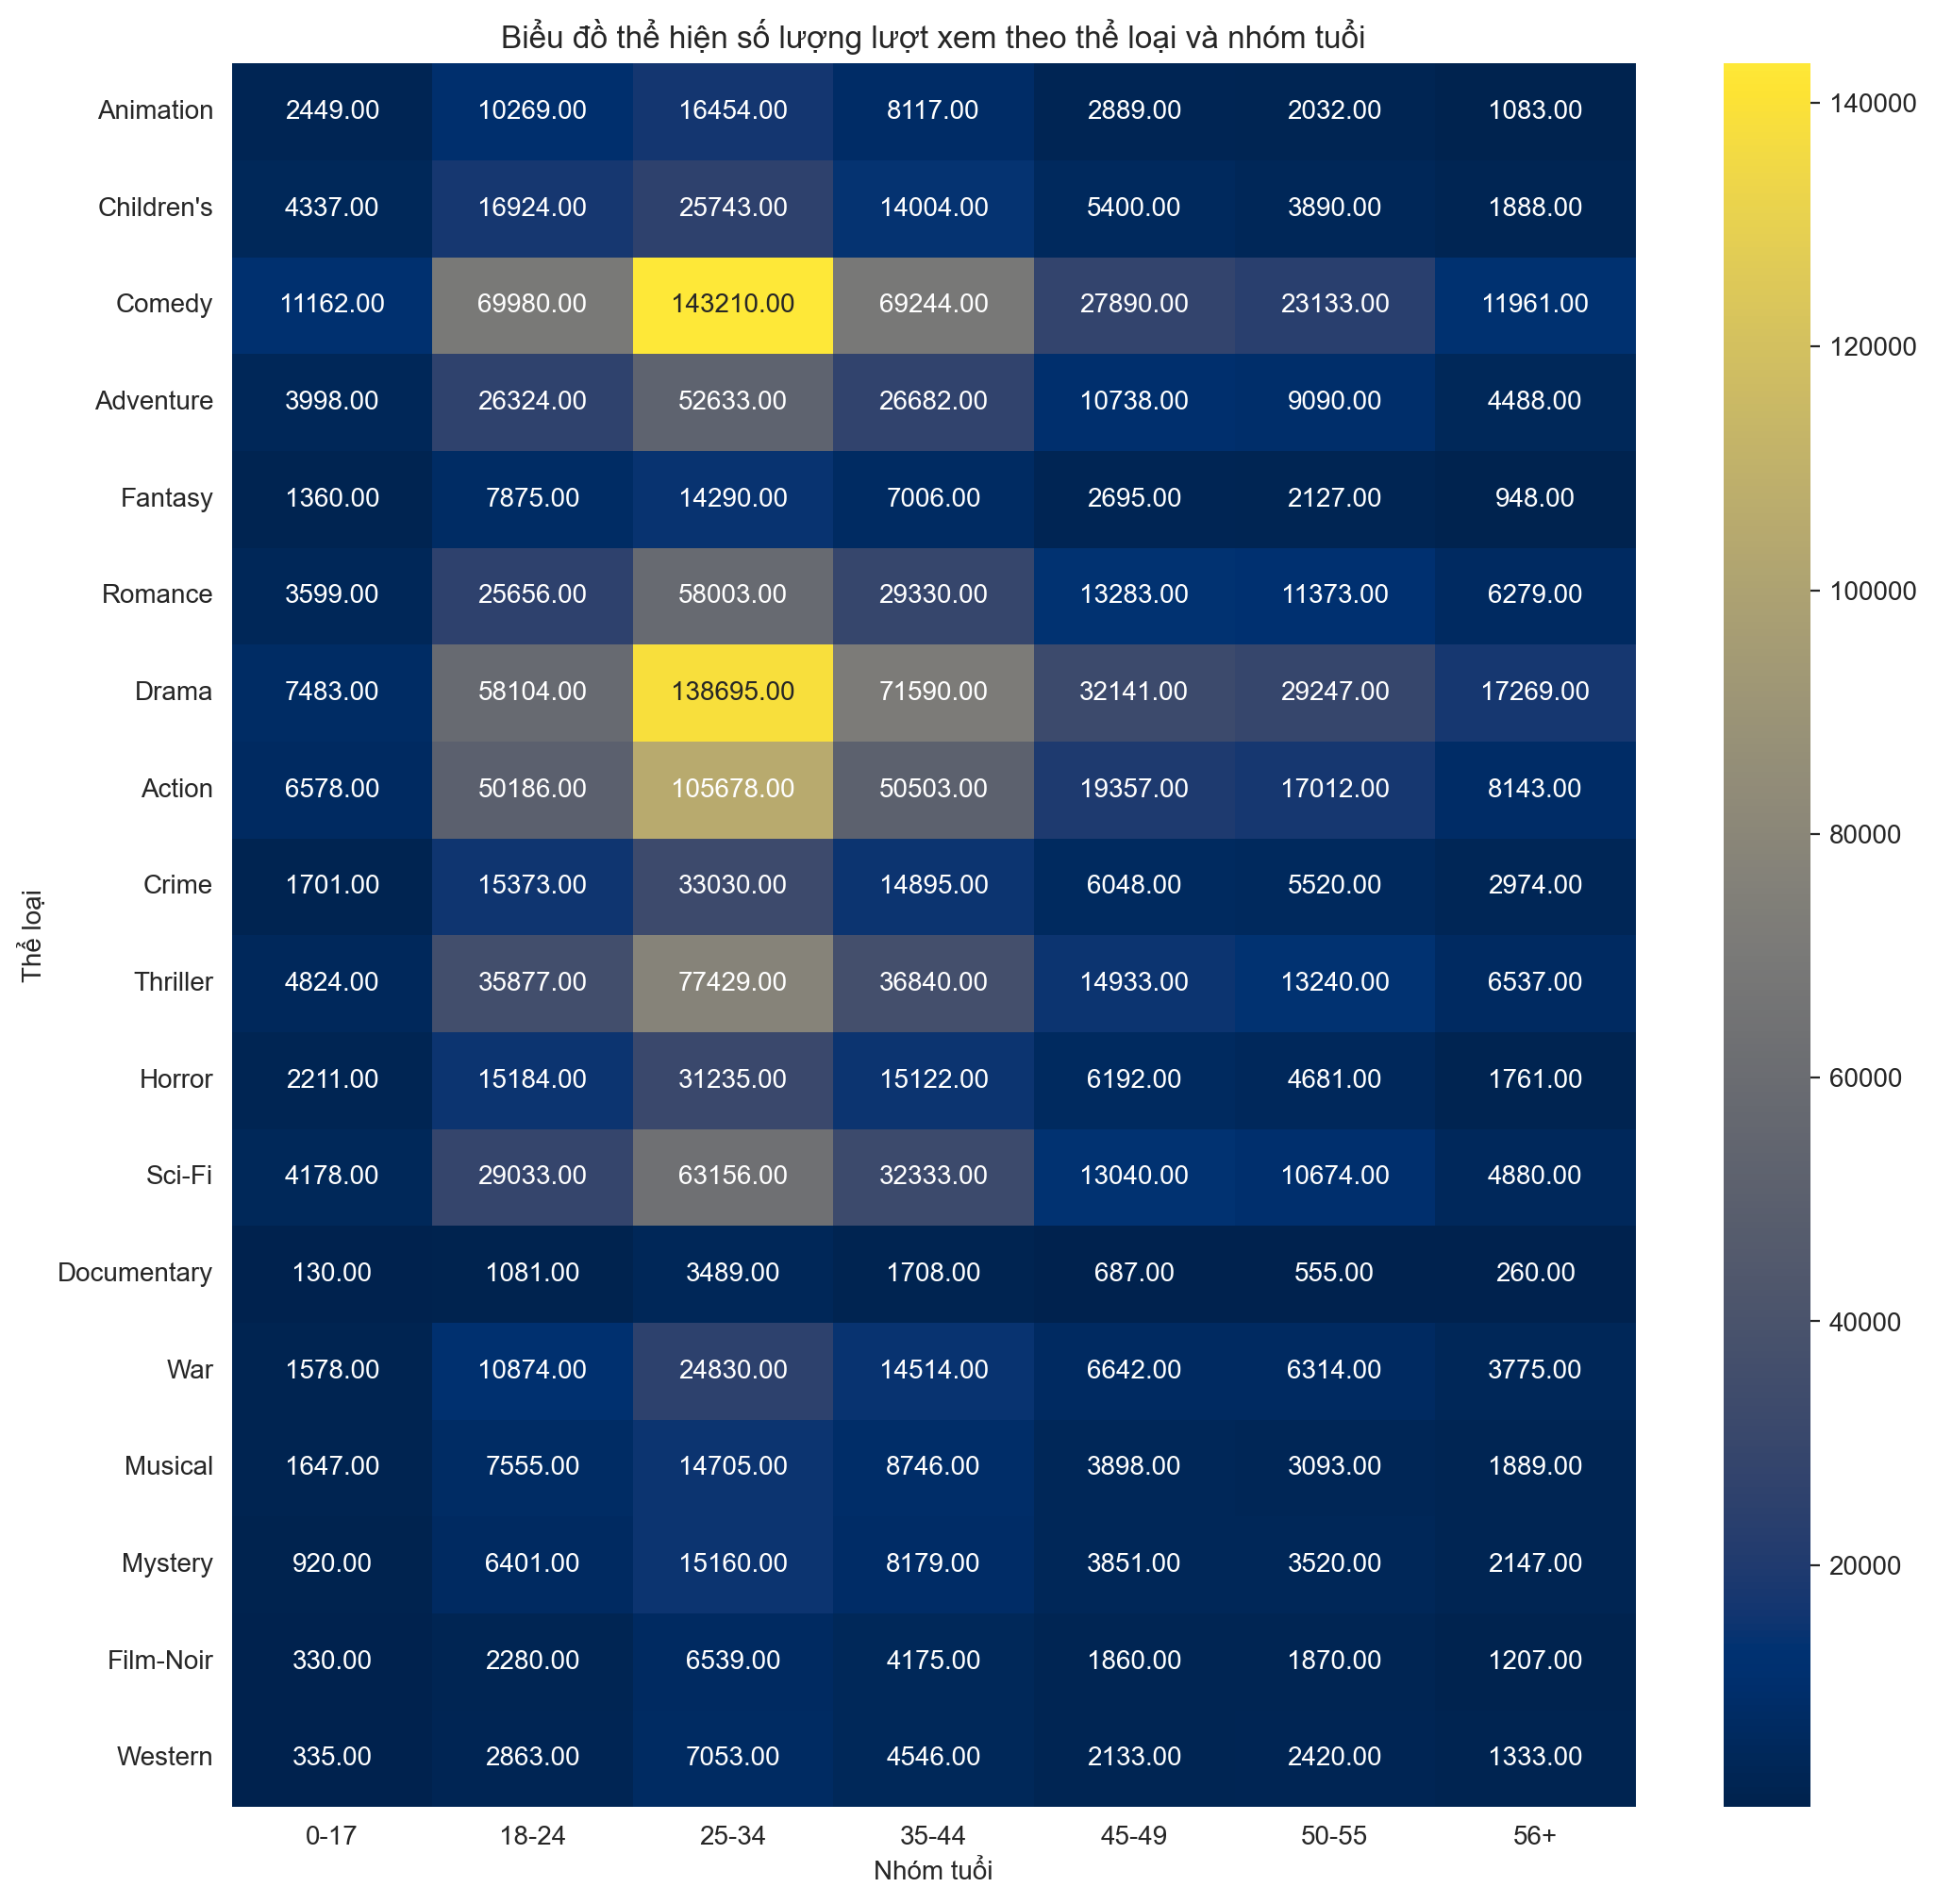

In [16]:
#test: Dữ liệu sau khi gộp 3 file và loại bỏ các cột không cần thiết
#genres: mảng chứa tên các thể loại
#X: mảng chứa các độ tuổi
#['Male','Female']: mảng chứa giới tính
#occupacy_label mảng chứa các nghề nghiệp

#Hàm tạo mảng chứa giá trị để tạo hm với giá trị là tổng số lượt xem thể hiện mối quan hệ
#giữa thể loại và col: đặc điểm của người xem
def getarr(genres, col, value_sort):
    #Mảng chứa giá trị để tạo heatmap
    arr1 = []
    
    #Điền giá trị mảng bằng giá trị xác định bằng cách lọc theo thể loại từ đó lọc 
    # theo điều kiện và tính giá trị đó   
    for genre in genres:
        item = np.array(test.loc[test[f"{genre}"] == 1].groupby(col).size().reindex(value_sort))
        arr1.append(np.array(item))
    return arr1

arr1 = getarr(genres, 'Age', X)

#Vẽ heatmap
plt.figure(figsize=(12,12), dpi=200)
sns.heatmap(arr1, annot=True, cmap='cividis', fmt='.2f', xticklabels=X, yticklabels=genres)

plt.title('Biểu đồ thể hiện số lượng lượt xem theo thể loại và nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Thể loại')
plt.savefig('heatmap1.jpg')
plt.show()


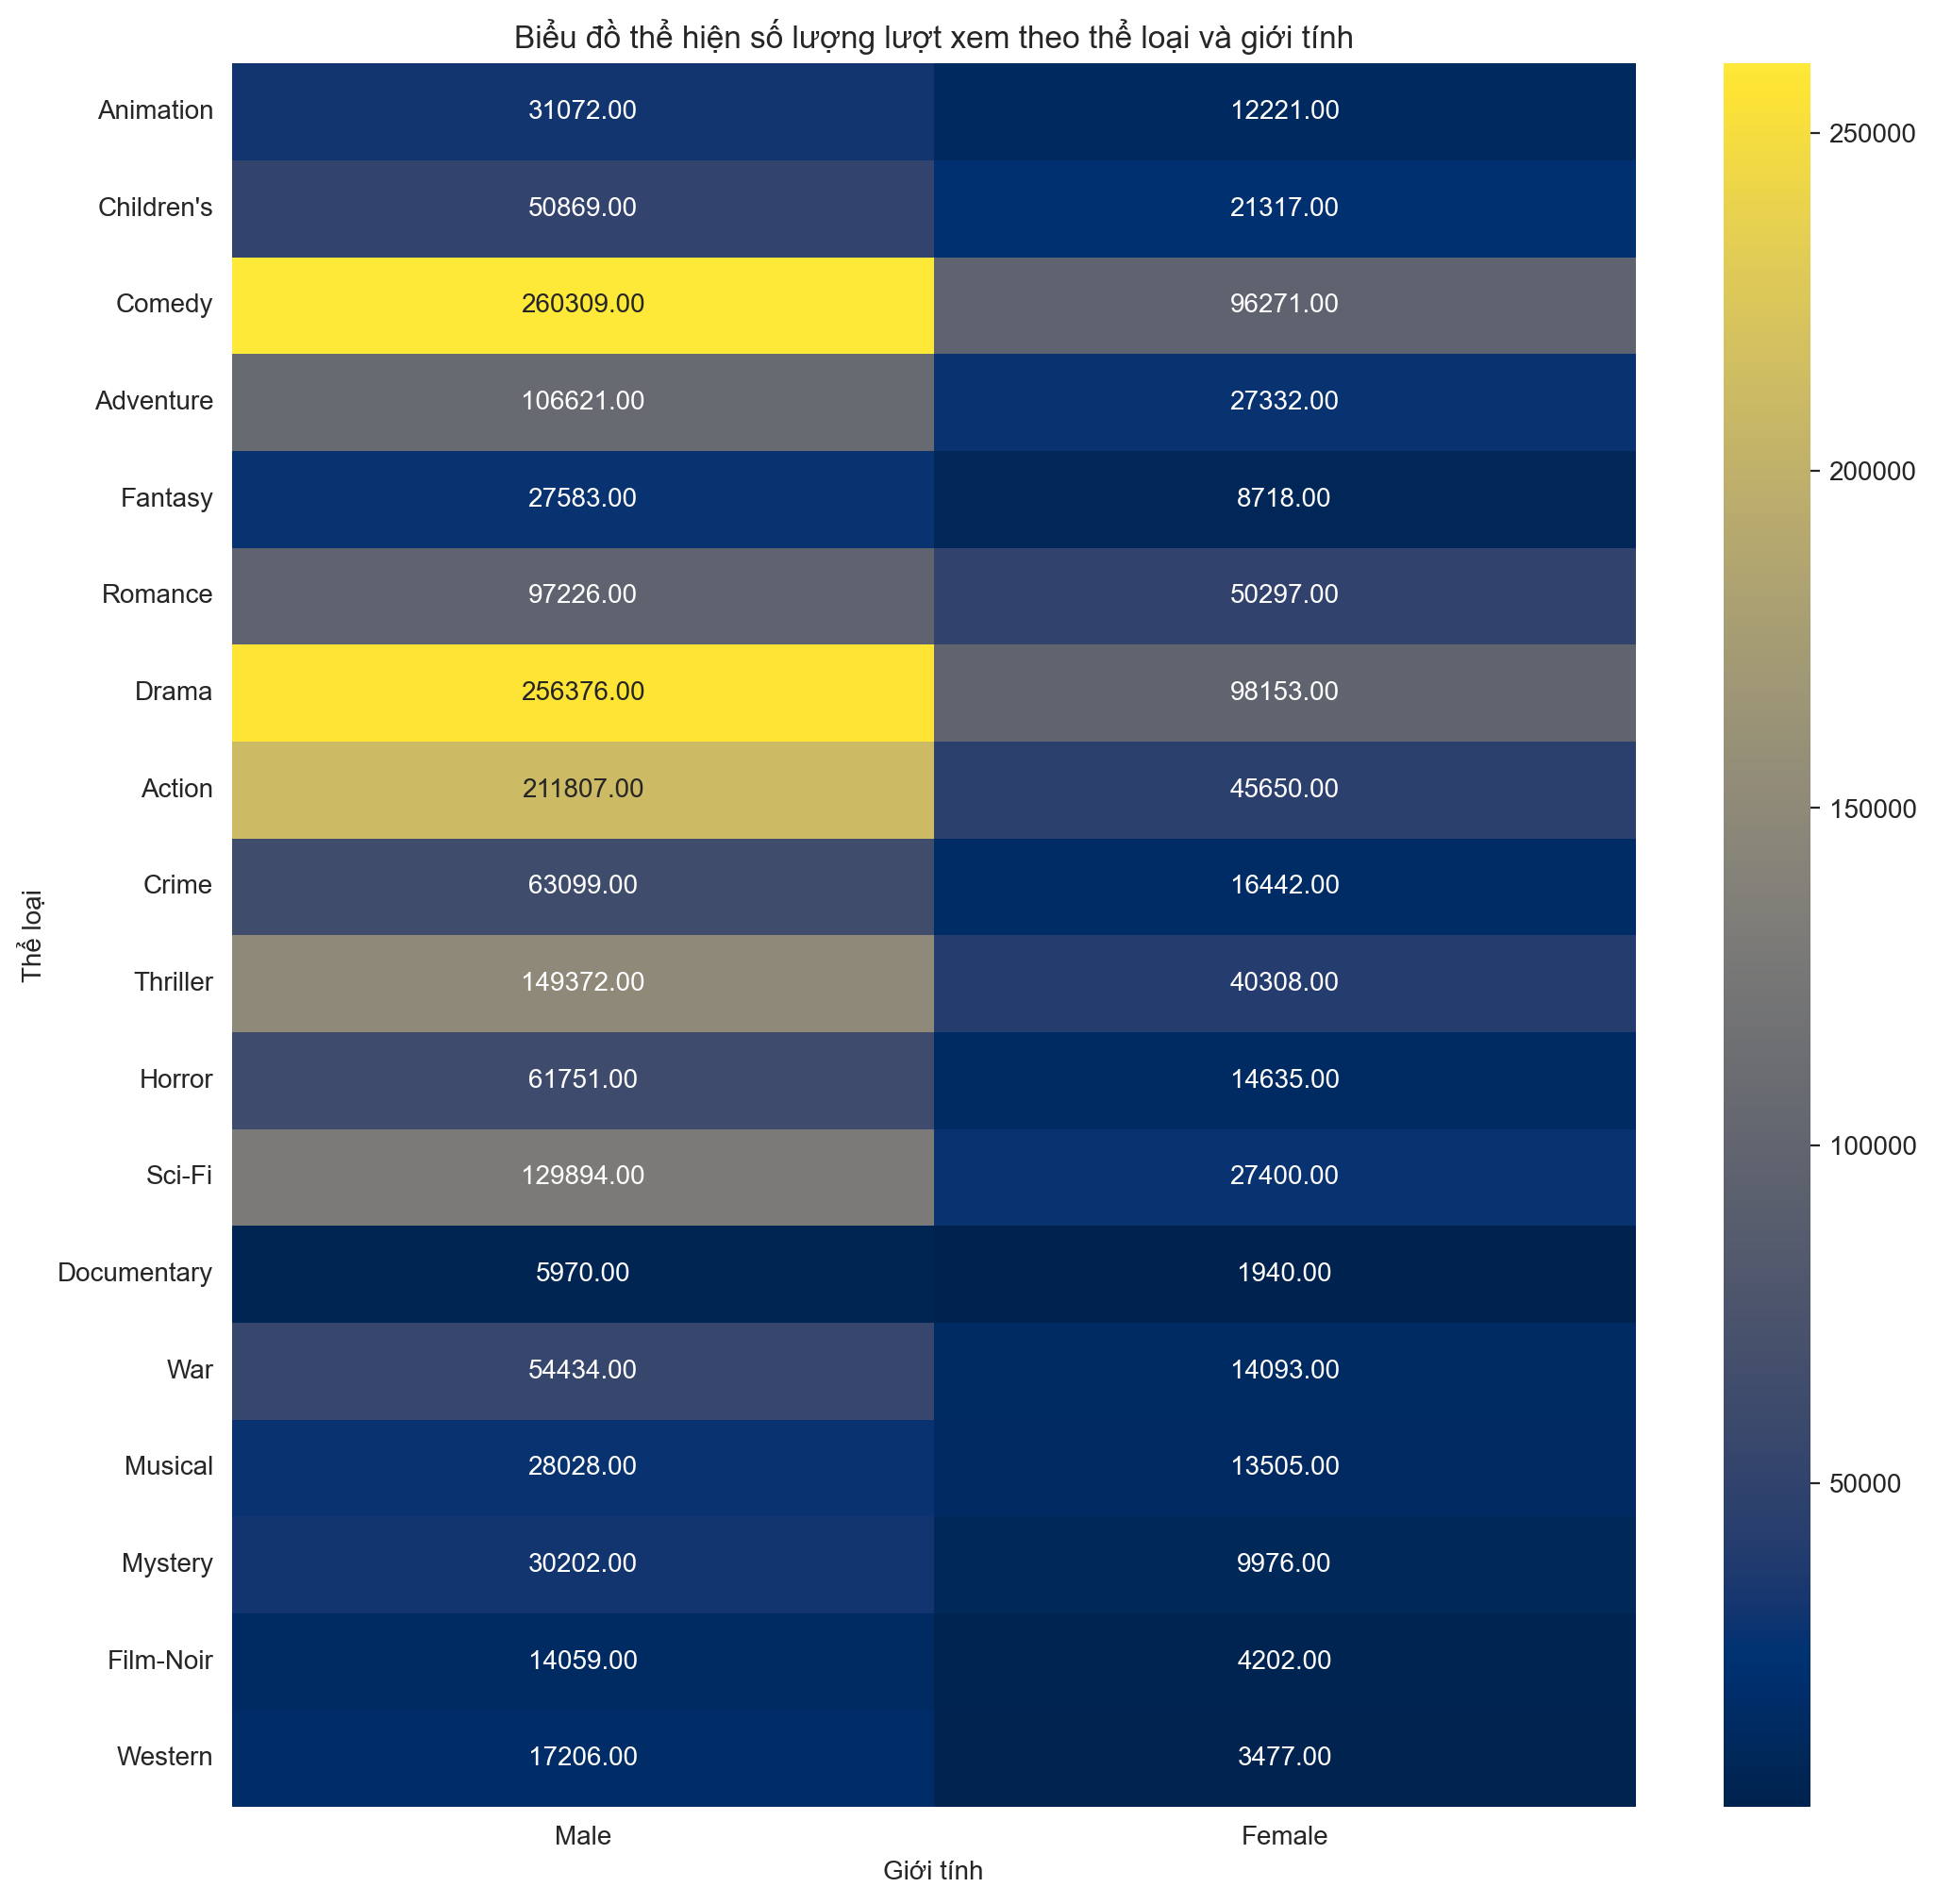

In [29]:
#test: Dữ liệu sau khi gộp 3 file và loại bỏ các cột không cần thiết
#genres: mảng chứa tên các thể loại
#X: mảng chứa các độ tuổi
#['Male','Female']: mảng chứa giới tính
#occupacy_label mảng chứa các nghề nghiệp

#Mảng chứa giá trị tạo heatmap
arr1 = getarr(genres, 'Gender', ['Male','Female'])

#Vẽ heatmap
plt.figure(figsize=(12,12), dpi=200)
sns.heatmap(arr1, annot=True, cmap='cividis', fmt='.2f', xticklabels=['Male','Female'], yticklabels=genres)

plt.title('Biểu đồ thể hiện số lượng lượt xem theo thể loại và giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Thể loại')
plt.savefig('heatmap2.jpg')
plt.show()


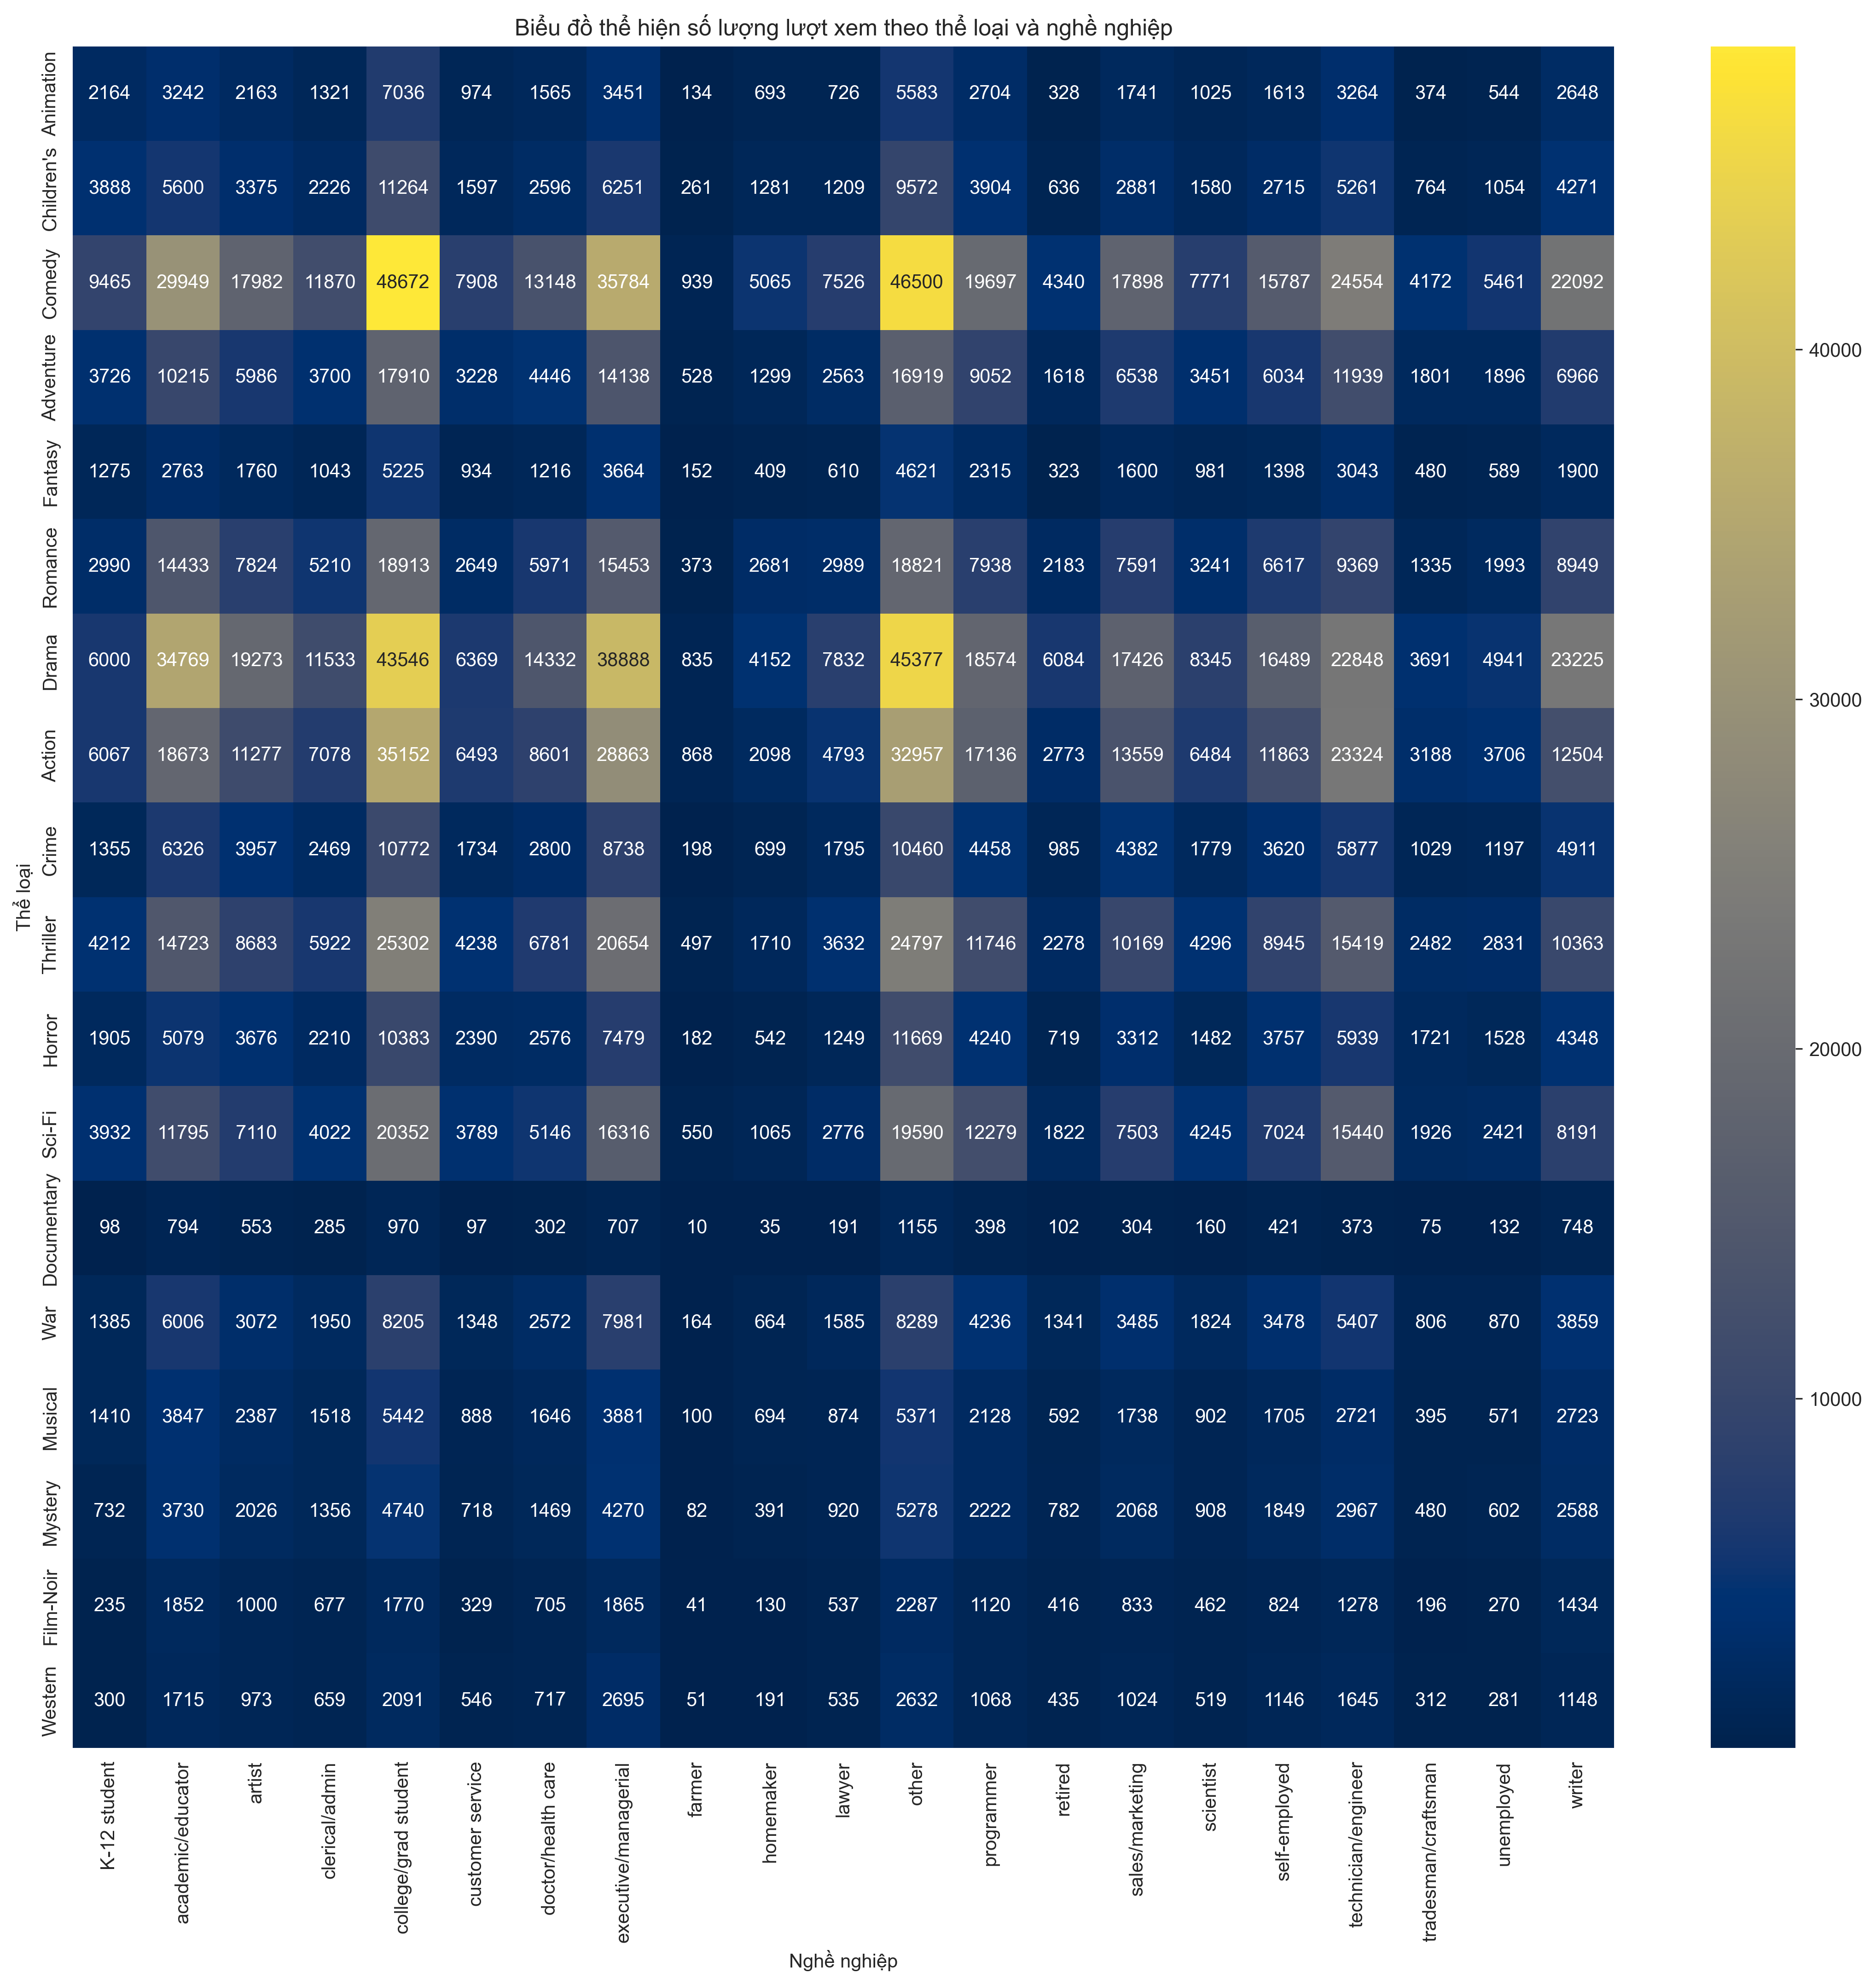

In [27]:
#test: Dữ liệu sau khi gộp 3 file và loại bỏ các cột không cần thiết
#genres: mảng chứa tên các thể loại
#X: mảng chứa các độ tuổi
#['Male','Female']: mảng chứa giới tính
#occupacy_label mảng chứa các nghề nghiệp

#Mảng chứa giá trị tạo heatmap
arr1 = getarr(genres, 'Occupation', occupacy_label)

#Vẽ heatmap
plt.figure(figsize=(18,16), dpi=300)
sns.heatmap(arr1, annot=True, cmap='cividis', fmt='.0f', xticklabels=occupacy_label, yticklabels=genres)

plt.title('Biểu đồ thể hiện số lượng lượt xem theo thể loại và nghề nghiệp')
plt.xlabel('Nghề nghiệp')
plt.ylabel('Thể loại')
plt.savefig('heatmap3.jpg')
plt.show()


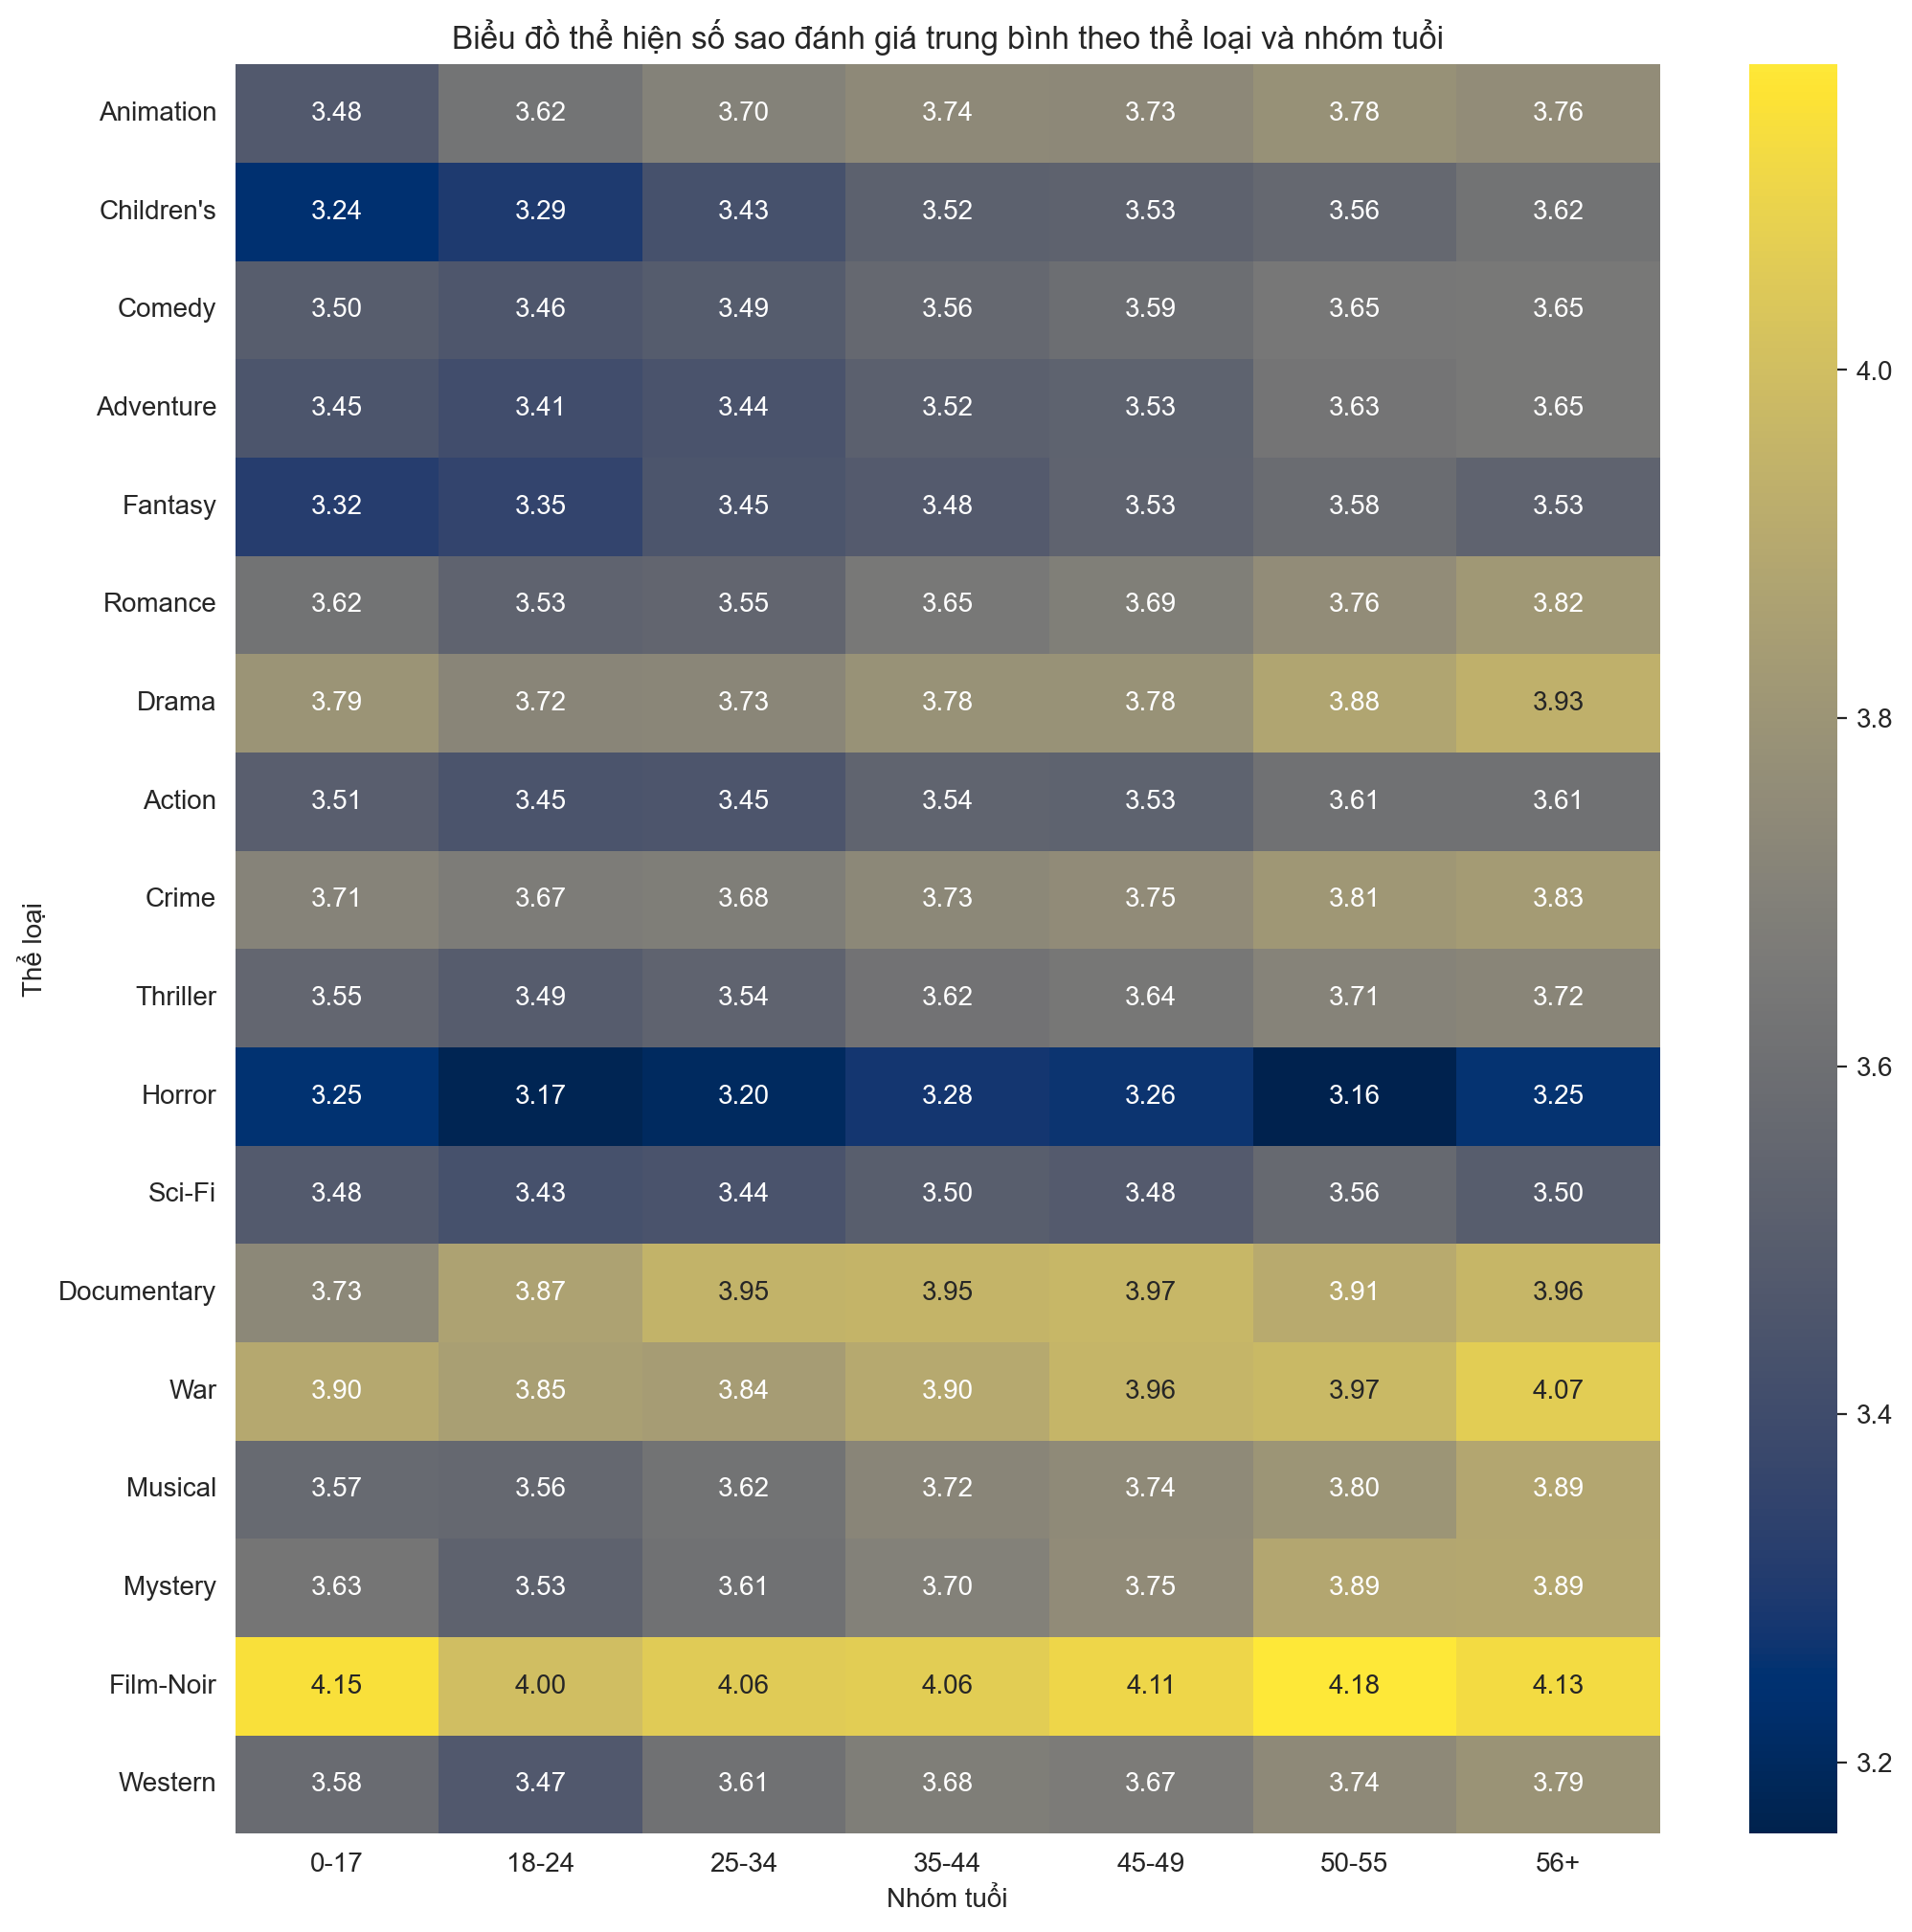

In [29]:
#test: Dữ liệu sau khi gộp 3 file và loại bỏ các cột không cần thiết
#genres: mảng chứa tên các thể loại
#X: mảng chứa các độ tuổi
#['Male','Female']: mảng chứa giới tính
#occupacy_label mảng chứa các nghề nghiệp

#Hàm lấy ra mảng dữ liệu số sao đánh giá trung bình của thể loại theo các đặc trưng
def getarr2(genres, col, value_sort):
    #Mảng chứa giá trị để tạo heatmap
    arr1 = []
    
    #Điền giá trị mảng 2 chiều bằng số sao đánh giá trung bình bằng cách lọc theo thể loại từ đó lọc 
    #theo điều kiện tính số sao đánh giá trung bình
    for genre in genres:
        arr1.append(np.array(test.loc[test[f"{genre}"] == 1].groupby(col).Rating.mean().reindex(value_sort)))
    return arr1
    
arr1 = getarr2(genres, 'Age', X)
# Vẽ heatmap
import seaborn as sns
plt.figure(figsize=(12,12), dpi=200)
sns.heatmap(arr1, annot=True, cmap='cividis', fmt='.2f', xticklabels=X, yticklabels=genres)

plt.title('Biểu đồ thể hiện số sao đánh giá trung bình theo thể loại và nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Thể loại')
plt.savefig('heatmap01.jpg')
plt.show()

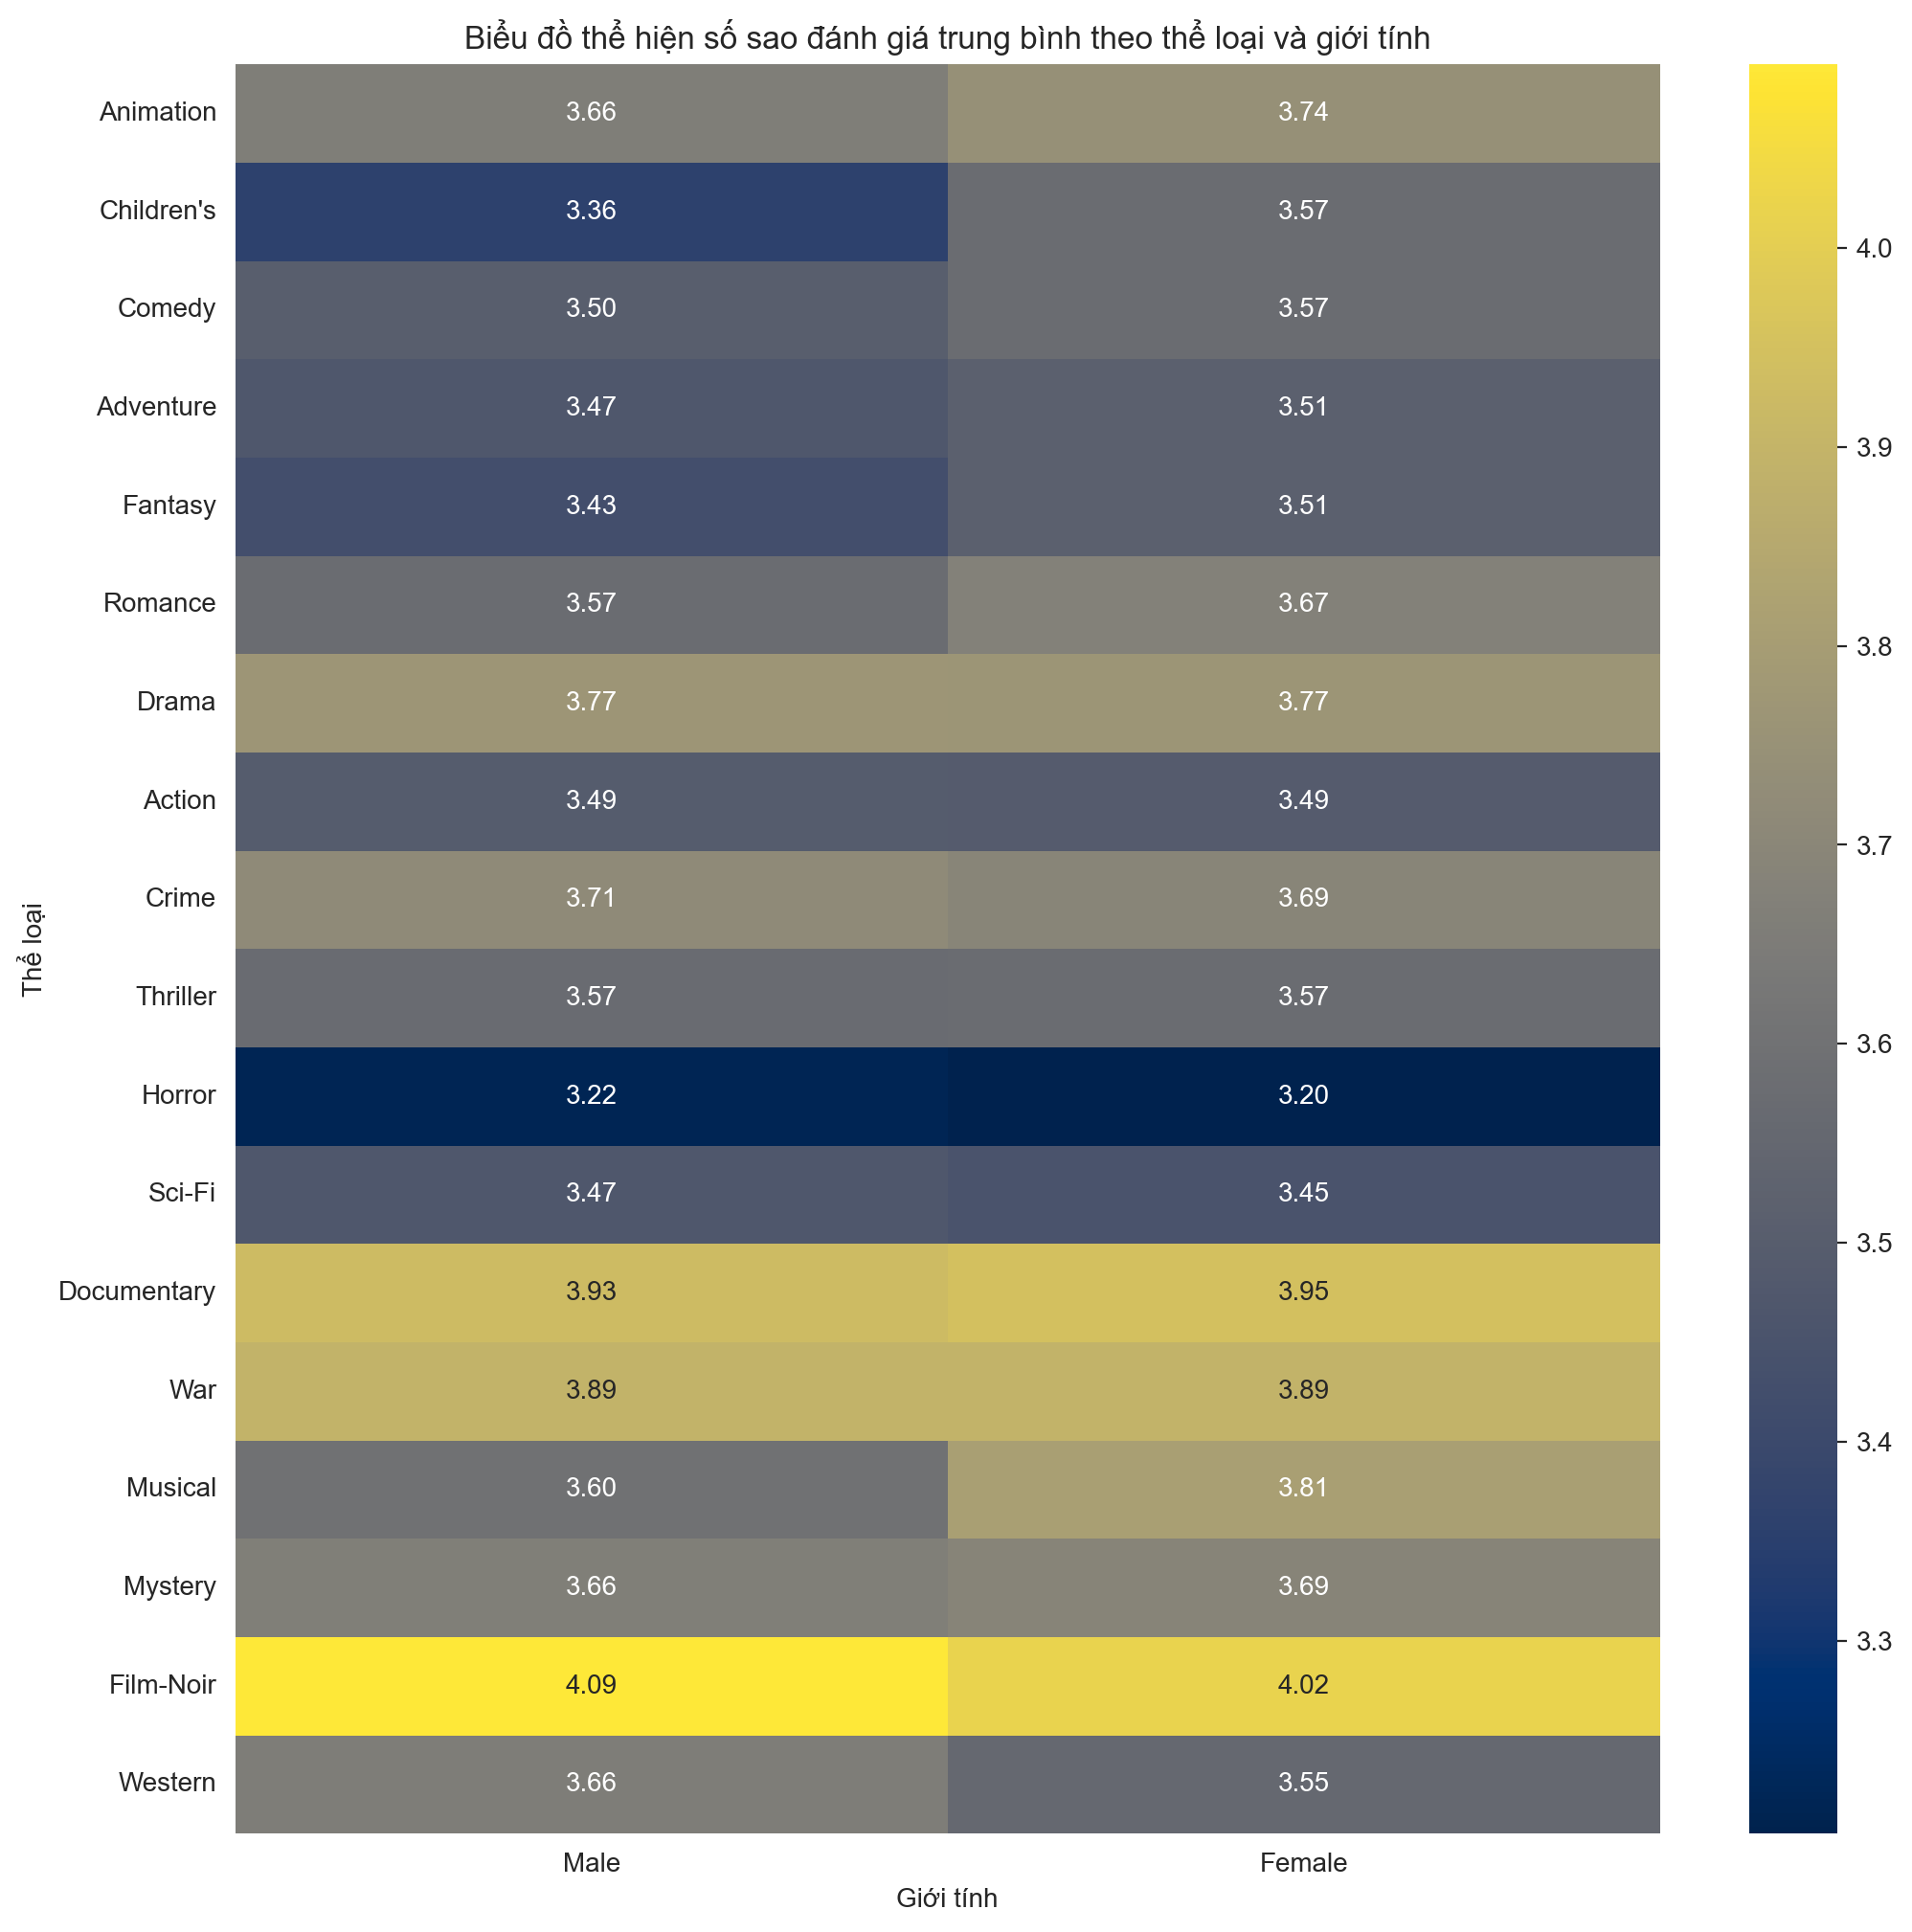

In [30]:
#test: Dữ liệu sau khi gộp 3 file và loại bỏ các cột không cần thiết
#genres: mảng chứa tên các thể loại
#X: mảng chứa các độ tuổi
#['Male','Female']: mảng chứa giới tính
#occupacy_label mảng chứa các nghề nghiệp
    
#Mảng chứa số sao đánh giá trung bình các thể loại theo giới tính
arr1 = getarr2(genres, 'Gender', ['Male','Female'])

# Vẽ heatmap
import seaborn as sns
plt.figure(figsize=(12,12), dpi=200)
sns.heatmap(arr1, annot=True, cmap='cividis', fmt='.2f', xticklabels=['Male','Female'], yticklabels=genres)

plt.title('Biểu đồ thể hiện số sao đánh giá trung bình theo thể loại và giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Thể loại')
plt.savefig('heatmap02.jpg')
plt.show()

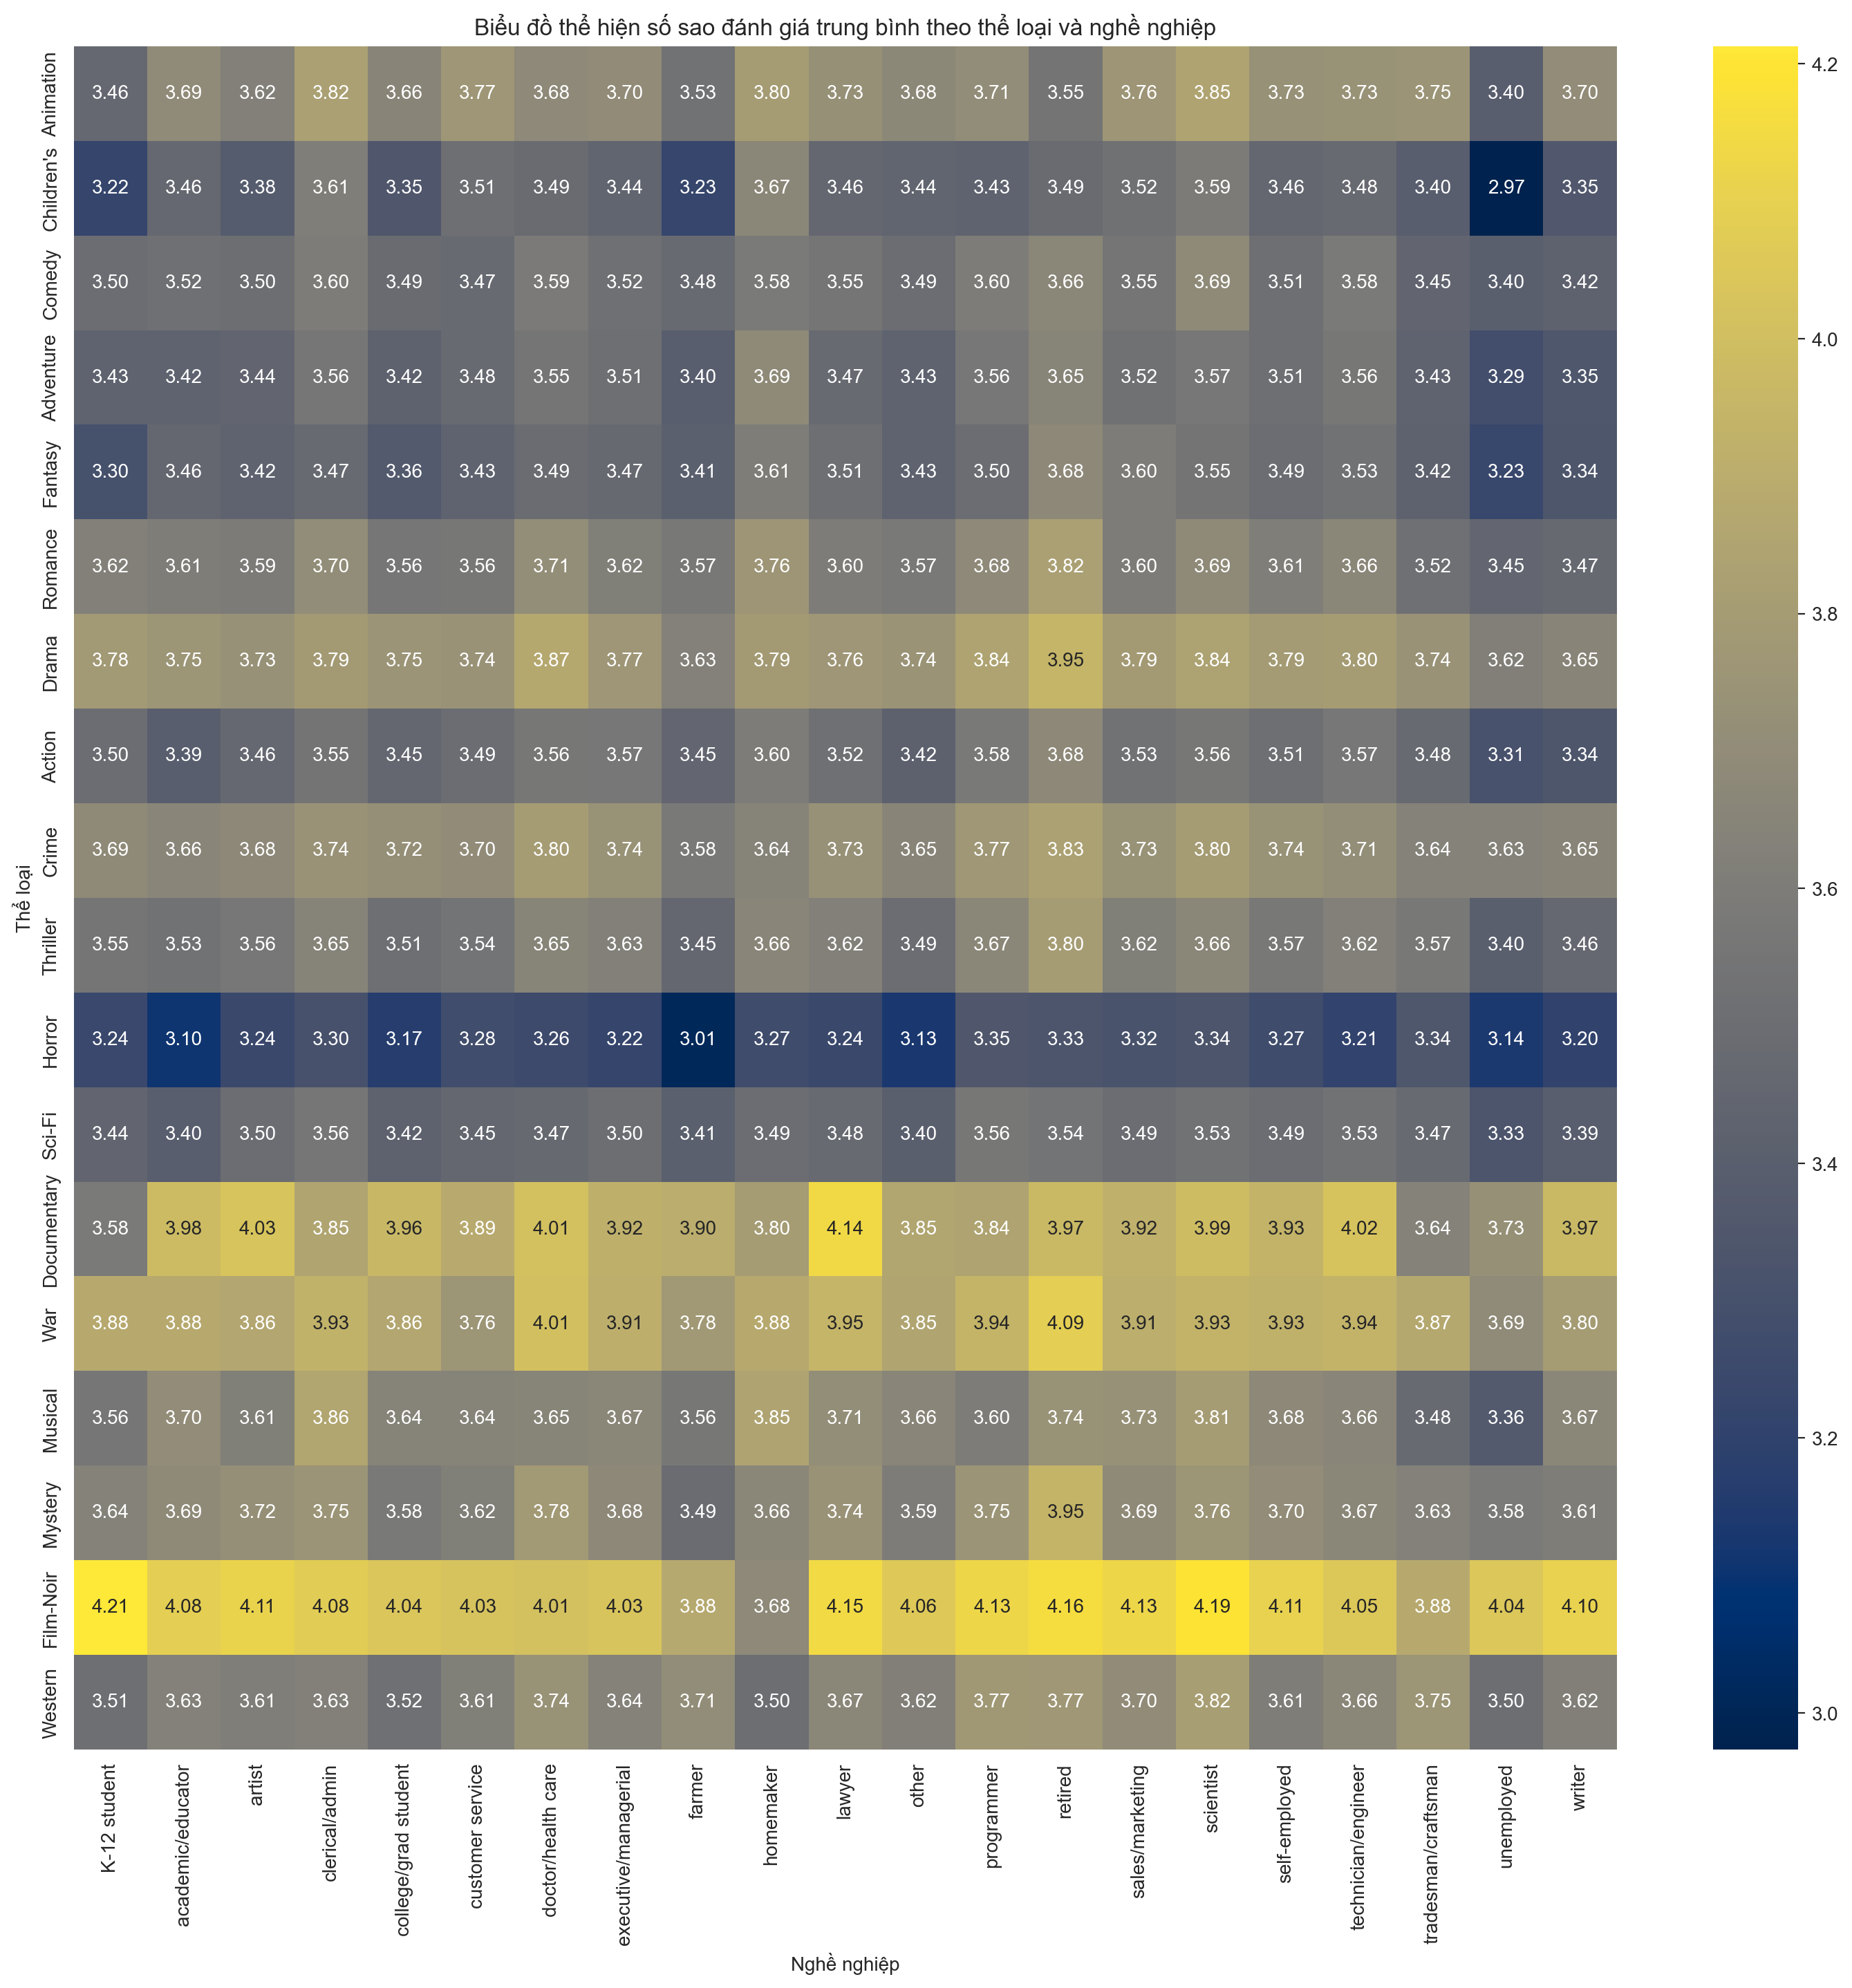

In [32]:
#test: Dữ liệu sau khi gộp 3 file và loại bỏ các cột không cần thiết
#genres: mảng chứa tên các thể loại
#X: mảng chứa các độ tuổi
#['Male','Female']: mảng chứa giới tính
#occupacy_label mảng chứa các nghề nghiệp
    
#Mảng chứa số sao đánh giá trung bình các thể loại theo nghề nghiệp
arr1 = getarr2(genres, 'Occupation', occupacy_label)

# Vẽ heatmap
import seaborn as sns
plt.figure(figsize=(18,16), dpi=200)
sns.heatmap(arr1, annot=True, cmap='cividis', fmt='.2f', xticklabels=occupacy_label, yticklabels=genres)

plt.title('Biểu đồ thể hiện số sao đánh giá trung bình theo thể loại và nghề nghiệp')
plt.xlabel('Nghề nghiệp')
plt.ylabel('Thể loại')
plt.savefig('heatmap03.jpg')
plt.show()